## Problem Statement - ML 2 Project - Coded

### Businees Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


### Data Description
  The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.  

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
* case_status: Flag indicating if the Visa was certified or denied




### PROBLEM DEFINITION

*	Build a Machine Learning model to predict the visa case status (Certified or Denied).
*	Automate the process of shortlisting candidates likely to get visa certification.
*	Provide recommendations to employers based on the key factors influencing visa approval.


### Importing necessary libraries

In [1]:
!pip install xgboost

In [2]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### Loading the dataset

In [3]:
 data= pd.read_csv("EasyVisa.csv")


In [4]:
# Checking the number of rows and columns in the data
data.shape

(25480, 12)

* The dataset has 25480 rows and 12 columns

## Data Overview

In [5]:
# let's create a copy of the data
df = data.copy()

### Displaying the first few rows of the dataset

In [6]:
# let's view the first 5 rows of the data
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [7]:
# let's view the last 5 rows of the data
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


### Checking the data types of the columns for the dataset

In [8]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* Only 2 variables are numerical and 1 variable is float64 rest all are object types.
* Columns have no missing values.
* The target variable for the models is case_status.
* case_id is a randomly assigned by INA for each case, which should not provide any material information for model building.

### Checking for duplicate values

In [9]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

### Checking for missing values

In [10]:
# let's check for missing values in the data
df.isnull().sum() 

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There is no missing values

In [11]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


**Observations**
* The mean and median values of no_of_employees are 5667 and 2109, respectively, implying a right-skewed distribution.
* The maximum value of no_of_employees is above 600000, which is quite high but possible.
* The minimum value of no_of_employees is -26, i.e., negative, which is unreasonable. The negative values should be treated as missing values.
* The oldest and newest employers have been established since (yr_of_estab =) 1800 and 2016, respectively.
* The distribution of prevailing_wage is difficult to interpret at this point, because its unit varies across the rows. However, the minimum value is above zero, which is reasonable.

In [12]:
# Check statistical summary of non-numeric data
df.describe(include=["object"]).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [13]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.000,NaN,NaN,NaN,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,NaN,NaN,NaN,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.000,NaN,NaN,NaN,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# list of all categorical variables
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
no_of_employees
183      18
854      16
724      16
766      15
1476     15
         ..


#### Observations
* The majority of employees are from Asia.
* The majority of employees have a Bachelor's degree.
* Most of the employees have job experience.
* The vast majority of the jobs do not require training.
* The regions Northeast, South, and West need most of the employees.
* The available units for wage are Year, Hour, Week, and Month. The majority of the wage values in the data are per year.
* The vast majority of the applications are for full-time positions.
* Near 2/3 of the visa applications are certified.

In [15]:
# enrollee_id is unique for each candidate and might not add value to modeling
df.drop(["case_id"], axis=1, inplace=True)

- We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

## Exploratory Data Analysis (EDA) 


**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [19]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

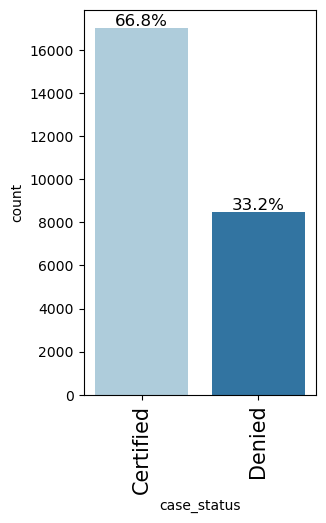

In [20]:
labeled_barplot(data=df,feature='case_status',perc=True)

* Almost two-thirds of the visa applications are certified.

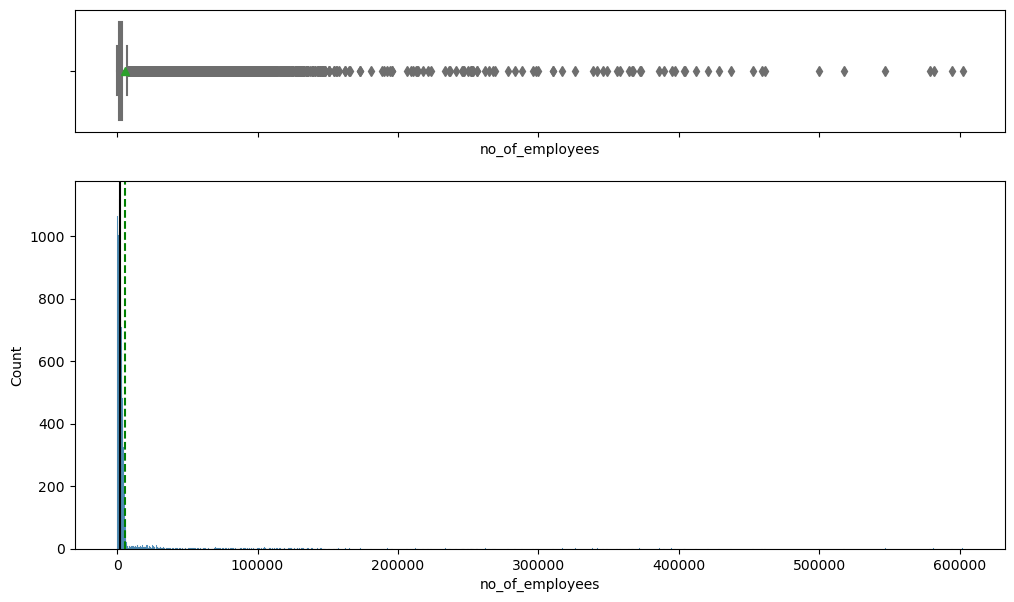

In [21]:
histogram_boxplot(df, 'no_of_employees')

##### Top Plot (Boxplot):

* This is a boxplot illustrating the spread and outliers of the number of employees.
* The plot reveals a large number of extreme outliers, as indicated by many points far beyond the box.
* The bulk of the data is concentrated near the lower range, as shown by the compressed box and whiskers.
* A green line likely represents the median, which is close to the lower end of the data distribution.

##### Bottom Plot (Histogram):

* This is a histogram showing the frequency distribution of the number of employees.
* Most of the values are clustered near 0, with very few counts as the number of employees increases.
* The histogram confirms the boxplot’s observation, highlighting a large skew towards smaller employee counts, with a few cases extending into very high numbers (long right tail).
* The green dashed line appears to represent a statistical measure such as the mean, which is also skewed due to the outliers.

##### Observation

* There is an extremely skewed distribution with most companies having a small number of employees, while a few have very large workforces.
* The large number of outliers suggests that while the majority of companies are small, there are some very large companies, creating a long tail in the data.
* The dataset likely contains many more small or medium-sized companies compared to large corporations.

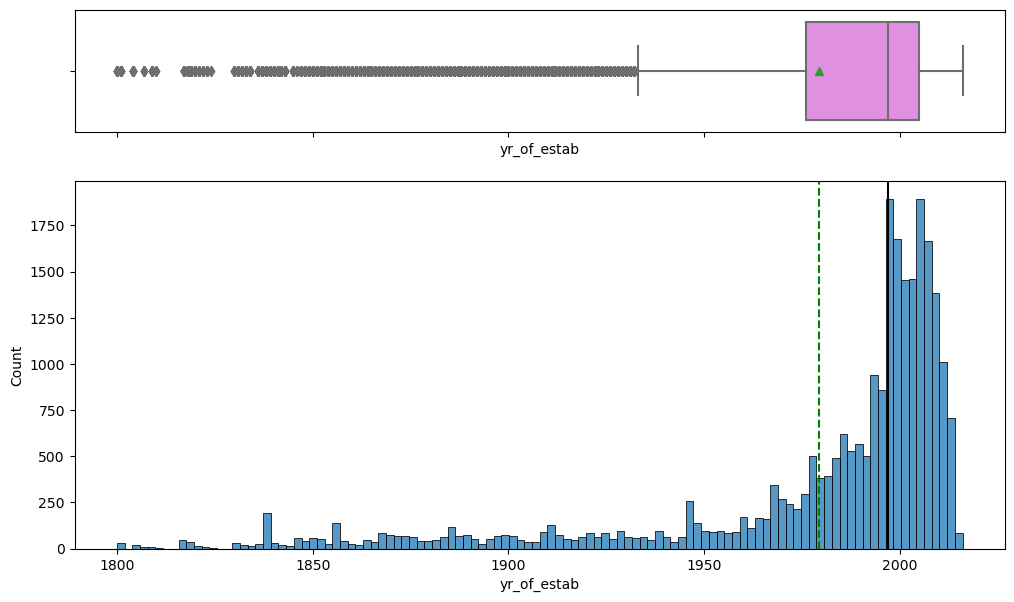

In [22]:
histogram_boxplot(df, 'yr_of_estab')

##### Top Plot (Boxplot):

* The boxplot shows the spread of the establishment years, with a range of data points concentrated in the later years (1900 onwards).
* There are several outliers extending far to the left, representing entities established a long time ago (pre-1800s).
* The box itself represents the interquartile range (IQR), and the line within the box is the median, indicating that most entities were established in recent decades.
* A green triangle likely represents the mean, slightly skewed towards the more recent years.

##### Bottom Plot (Histogram):

* The histogram shows the frequency distribution of establishment years.
* There is a significant increase in the number of entities established from around the mid-1900s onwards, with a sharp rise in recent decades.
* The counts rise dramatically after the 1950s and peak around the late 1990s to early 2000s.
* A green dashed line indicates the mean, which aligns with the mid to late 20th century, matching the sharp increase seen in the histogram.

##### Key Observations:

* The data is right-skewed, indicating that most entities were established more recently, with fewer organizations being much older.
* Outliers are seen in the boxplot for organizations established much earlier, but these represent a small portion of the overall data.
* The majority of entities in this dataset were established after 1950, with a particularly large number in the last few decades.

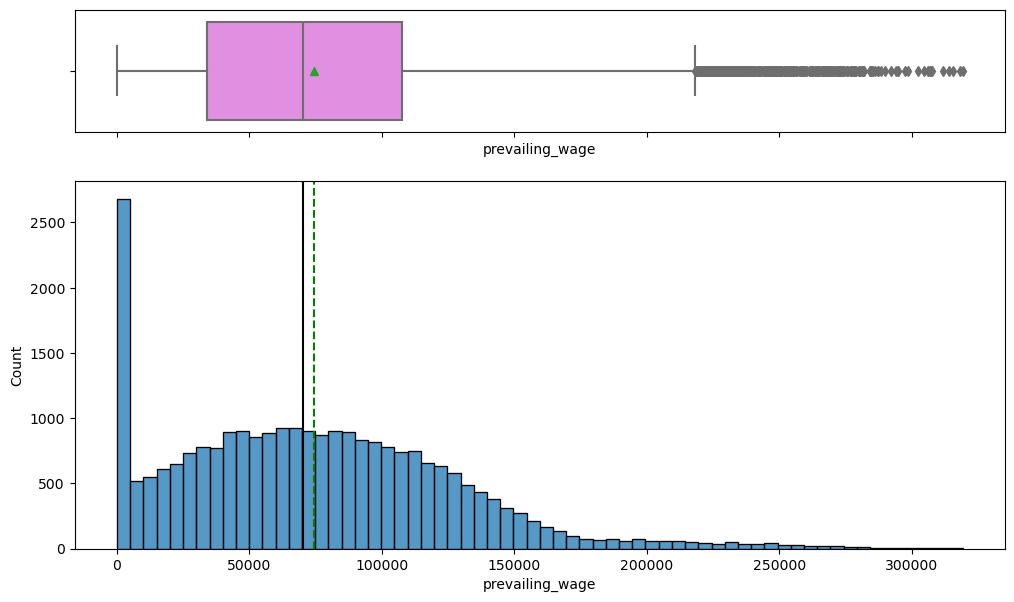

In [23]:
histogram_boxplot(df, 'prevailing_wage')

#### Top Plot: Boxplot of prevailing_wage
Boxplot: This shows the five-number summary (minimum, first quartile, median, third quartile, maximum).
* The box represents the interquartile range (IQR), showing the spread of the middle 50% of the data.
* The green triangle represents the mean, while the line inside the box is the median.
* Whiskers extend to show the range of data within 1.5 times the IQR.
* There are outliers in the distribution (data points outside the whiskers, mostly on the higher end), indicating some extreme wage values.
#### Bottom Plot: Histogram of prevailing_wage
Histogram: The histogram represents the frequency distribution of the prevailing_wage.
* There is a large peak at zero, suggesting a significant number of entries with a prevailing_wage of zero.
* The distribution is right-skewed with a long tail extending towards higher wage values (e.g., beyond $100,000).
* The green dashed line likely represents the mean wage.
#### Key Observations:
* Outliers: The presence of outliers in the boxplot suggests that there are extreme values, which may need further investigation or treatment (e.g., capping or log transformation).
* Zero Wage: A significant number of data points have a prevailing_wage of zero, which could either be missing data or cases where wages weren't recorded.
* Skewness: The right skewness of the wage distribution indicates that most wages are clustered in the lower range, with a few very high wage values.

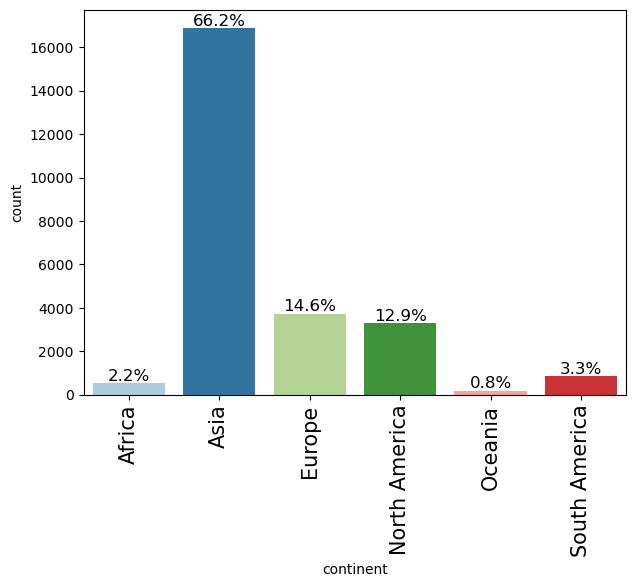

In [24]:
labeled_barplot(data=df,feature="continent",perc=True)

* The majority (66%) of the visa applicants are from Asia, which makes sense given the high population of this continent.
* The lowest fraction (<1%) of the applicants are from Oceania, which also makes sense given its very low population.
* North America and Europe have close number of applicants (12.9% and 14.6%).

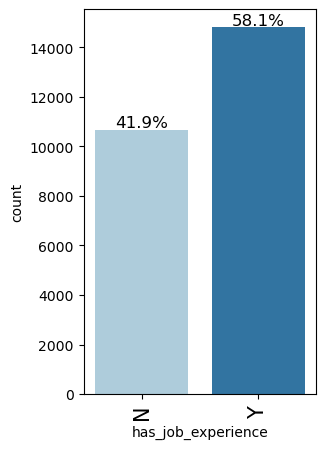

In [25]:
labeled_barplot(data=df,feature="has_job_experience",perc=True) 

* More than half (58%) of the applicants have job experience.

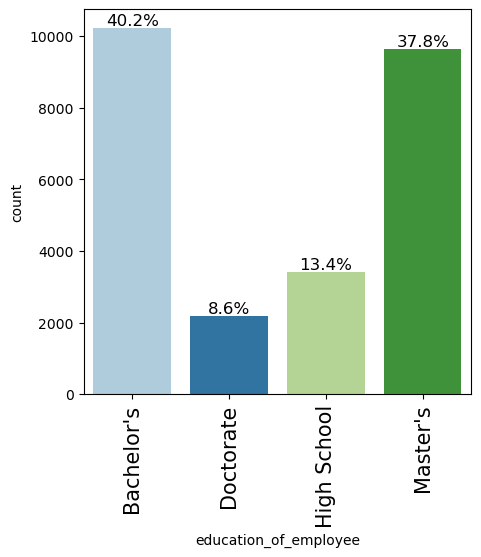

In [26]:
labeled_barplot(data=df,feature="education_of_employee",perc=True) 

* The majority of the applicants have either bachelor's degrees (40.2%) or master's degrees (37.8%).
* Only 8.6% of the applicants have doctorate degrees.

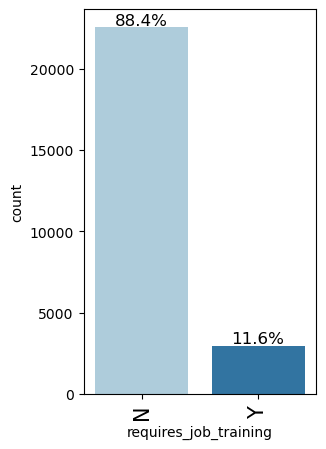

In [27]:
labeled_barplot(data=df,feature="requires_job_training",perc=True) 

* The vast majority (>88%) of the jobs do not require the applicants to receive training.

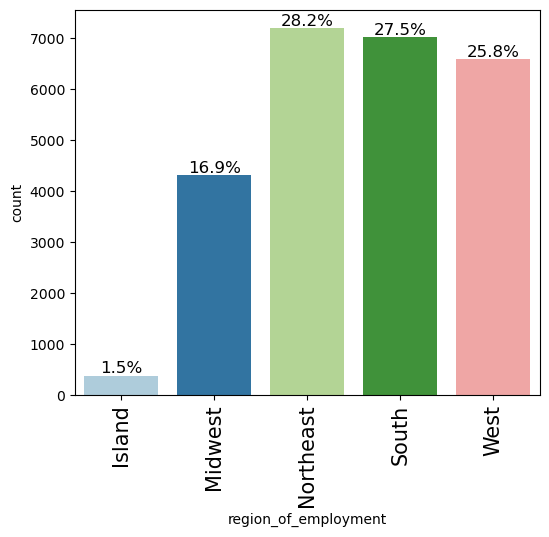

In [28]:
labeled_barplot(data=df,feature="region_of_employment",perc=True) 

* Most of the applications are for employment in the Northeast, South, and West regions of the United States.
* This could be expected because the majority of the tech companies are in those regions and the populations of those regions are higher than the other regions of the United States.
* The Island region has the lowest number (1.5%) of work visa applicants.

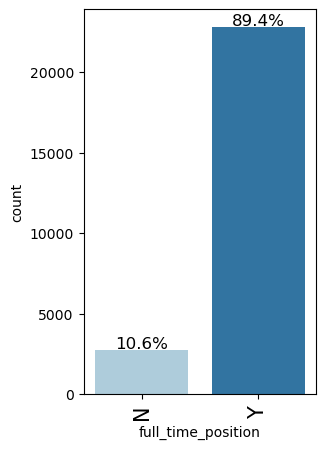

In [29]:
labeled_barplot(data=df,feature="full_time_position",perc=True) 

* More than 89% of the applications are related to full-time employment.

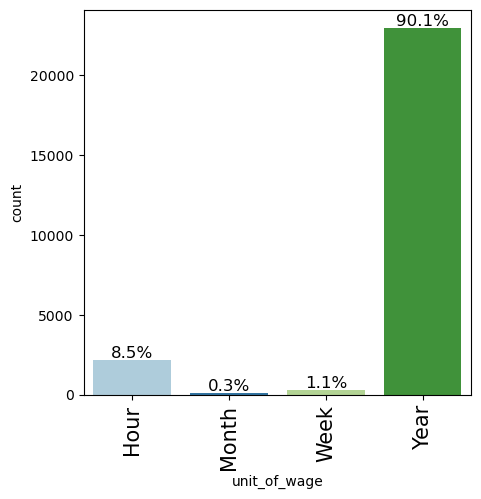

In [30]:
labeled_barplot(data=df,feature="unit_of_wage",perc=True) 

* The dominant majority (90%) of the applications are for the jobs whose prevailing wages are computed per year.

In [31]:
#### Bivariate Analysis

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


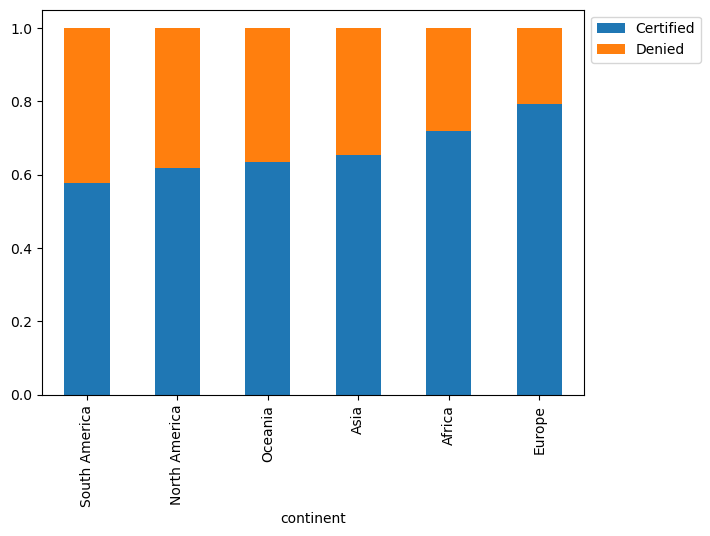

In [32]:
stacked_barplot(data,"continent","case_status",)

* Among different continents, Europe has the highest work visa certification rate (79%).
* The lowest work visa certification rate belongs to South America (58%).

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


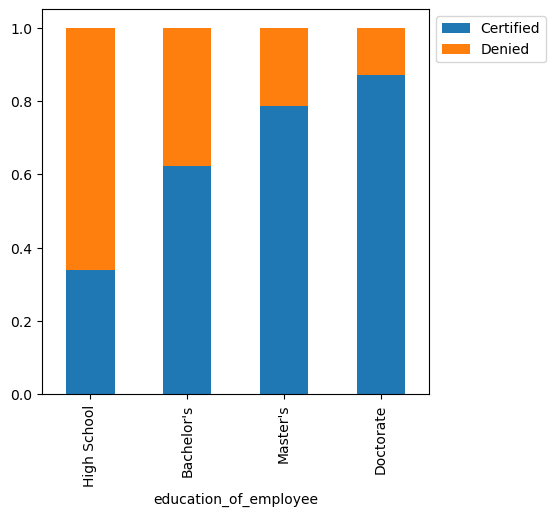

In [33]:
stacked_barplot(
    data=df,
    predictor="education_of_employee",
    target="case_status",
    
)

* It is clear that the higher the education level of an applicants is, the more their chances of visa certification are.
* More specifically, while the visa certification likelihood of the applicants of a doctorate degree is 87%, this likelihood is only 34% for the applicants of high school education.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


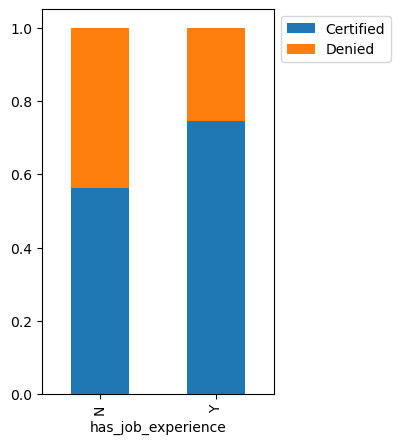

In [34]:
stacked_barplot(data,"has_job_experience","case_status")

* Having job experience is found to have a positive effect on the visa certification likelihood.
* More specifically, about 74% of the experienced applicants are granted visas, while this percentages is only 56% for the inexperienced applicants.

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


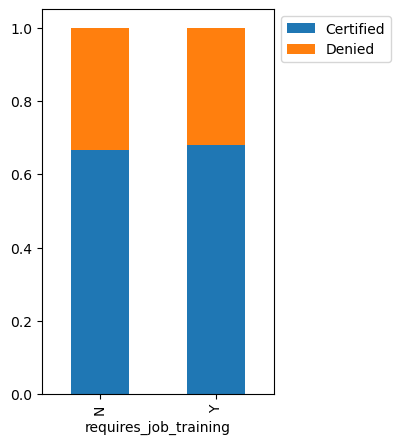

In [35]:
stacked_barplot(data,"requires_job_training","case_status")

* The visa certification likelihood is found nearly unaffected by the job training requirement.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


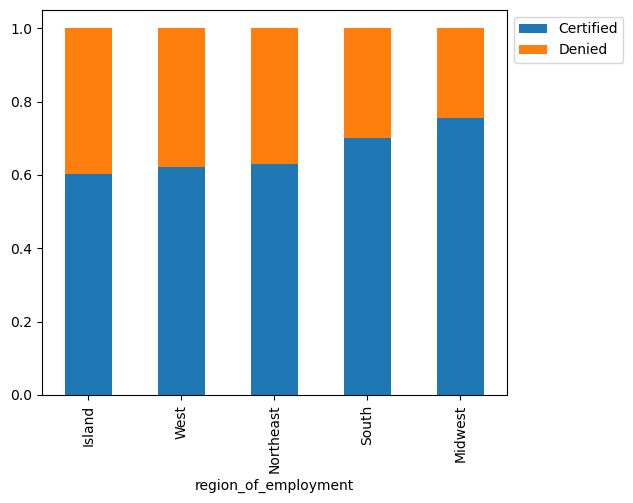

In [36]:
stacked_barplot(data,"region_of_employment","case_status")

* It appears that the visa applications filed by the employers within the Midwest region have the highest probability (~76%) of certification.
* The employers located in the Northeast, West, and Island regions have lower chances (60-63%) of visa certification.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


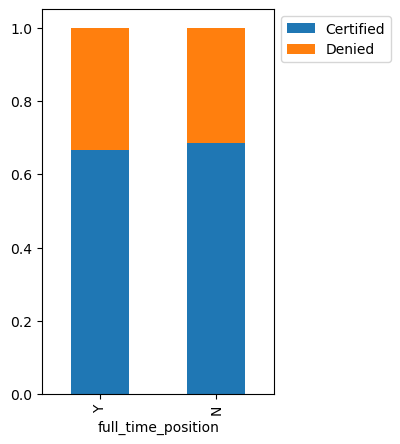

In [37]:
stacked_barplot(data,"full_time_position","case_status")

* Visa certification seems to be unaffected by whether a position is full-time or part-time.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


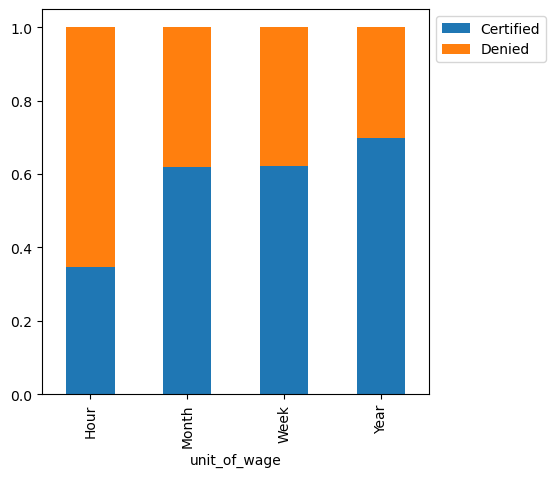

In [38]:
stacked_barplot(data,"unit_of_wage","case_status")

* Those applicants whose wage unit is year are more likely than other applicants to be certified for a visa (~70% likelihood).
* The applicants who are paid by hour are the least likely to be certified for a visa (~35% likelihood).
* This could be predicted, because hourly jobs are usually less important for the growth of the United States and they could be done by normal American workers.

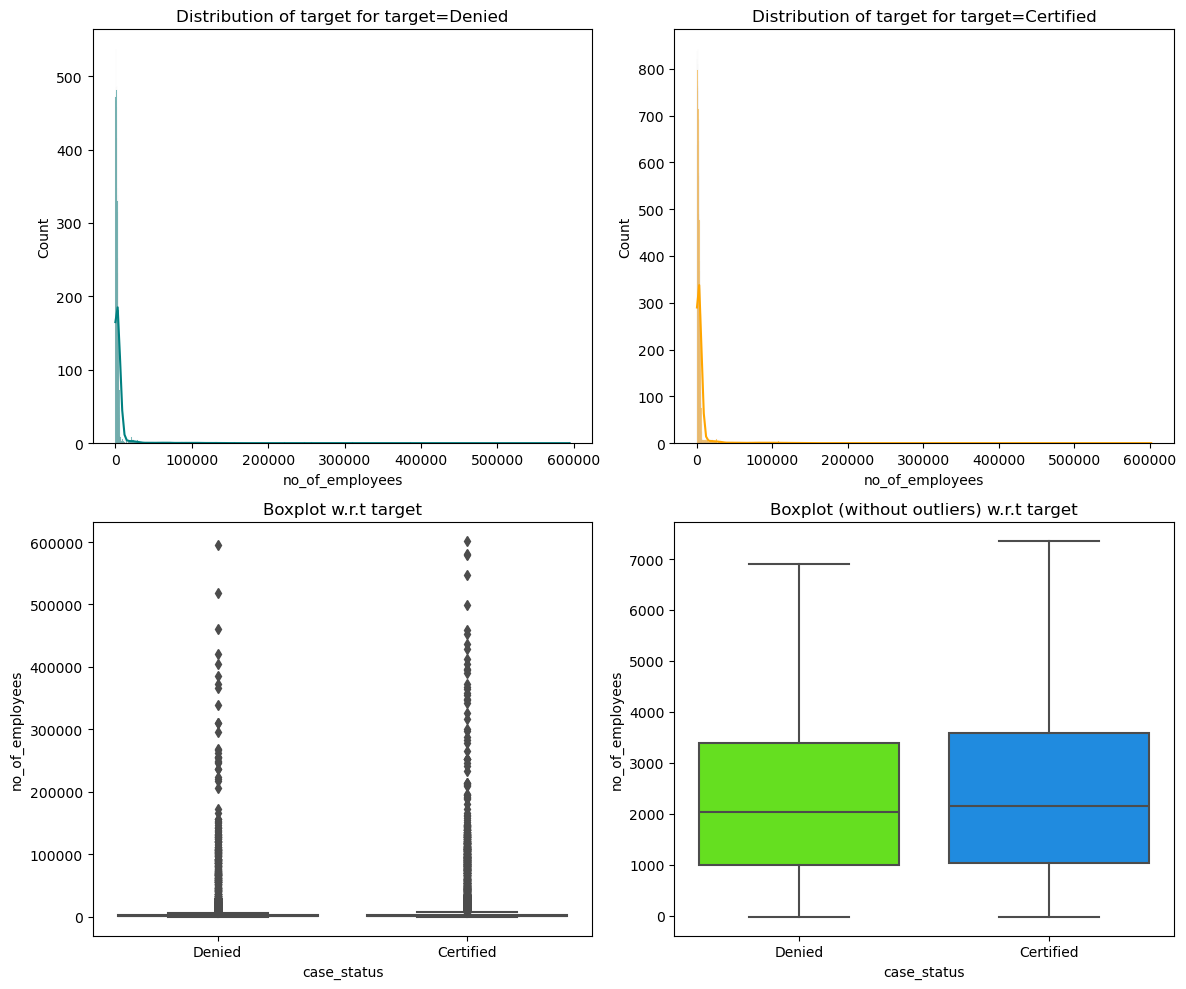

In [39]:
distribution_plot_wrt_target(data=df, predictor="no_of_employees", target="case_status")

* A very small difference is observed between the distributions of the employer's number of employees for those applications that are denied and those that are certified. 
* As a result, it seems that the number of employees has insignificant effect on the likelihood of visa certification.

requires_job_training      N     Y    All
continent                                
All                    22525  2955  25480
Asia                   15113  1748  16861
Europe                  2993   739   3732
North America           3044   248   3292
South America            702   150    852
Africa                   510    41    551
Oceania                  163    29    192
------------------------------------------------------------------------------------------------------------------------


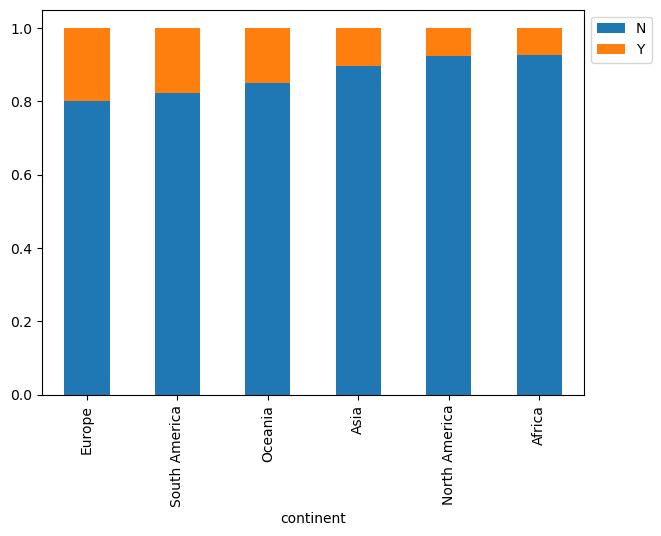

In [40]:
stacked_barplot(data,predictor="continent",target="requires_job_training")

* Among the applicants from different continents, a smaller ratio of those from Africa and North America need training than those from other continents.
* The highest ratio of the applicants who need training belongs to those from Europe.

### Multivariate Analysis

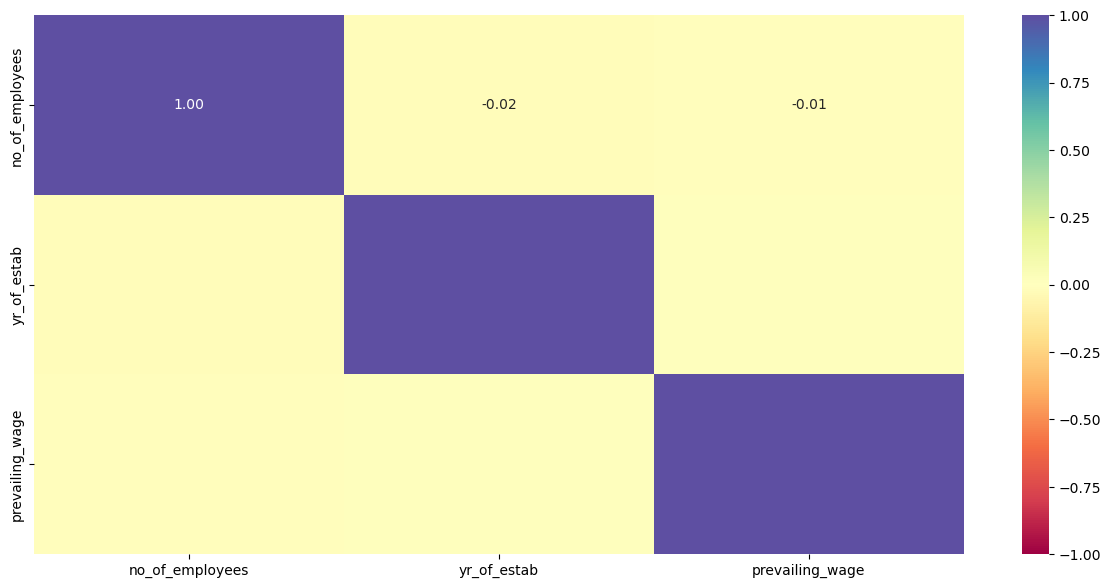

In [41]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* no_of_employees and yr_of_estab: Correlation is -0.02. This near-zero value suggests no significant linear relationship between the number of employees and the year the establishment was founded.
* no_of_employees and prevailing_wage: Correlation is -0.01. Again, this indicates a very weak and almost negligible negative relationship between the number of employees and the prevailing wage.
* yr_of_estab and prevailing_wage: Correlation is -0.01, meaning there is almost no linear relationship between the year the company was established and the prevailing wage.

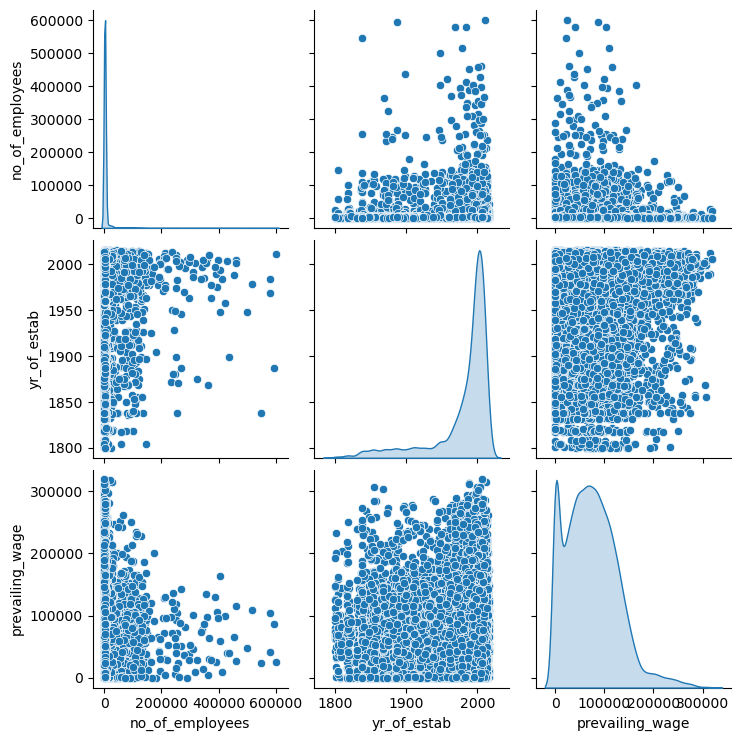

In [42]:
sns.pairplot(
    data, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag

### no_of_employees vs prevailing_wage:
* There's no strong linear relationship visible. Companies with a small number of employees dominate the data, and their wages seem to vary broadly.
* Some larger companies offer wages across the full range, but there’s no clear upward trend.
### yr_of_estab vs prevailing_wage:
* A slight positive relationship can be observed here. Newer companies (founded in more recent years) tend to offer higher wages compared to older companies.
* However, older companies still have a spread of wages, though concentrated on the lower side.
### no_of_employees vs yr_of_estab:
* Most newer companies (post-2000) have a smaller number of employees, but some older companies show a larger workforce.
* There seems to be no strong relationship between the age of the company and the number of employees, indicating that the size of a company might not depend solely on its establishment year.

#### QUESTIONS

#### 1. Does education play a role in Visa certification?

In [43]:
#group data by education_of_employee and count the numbers of each case_status for each category
df.groupby('education_of_employee')['case_status'].value_counts()


education_of_employee  case_status
Bachelor's             Certified      6367
                       Denied         3867
Doctorate              Certified      1912
                       Denied          280
High School            Denied         2256
                       Certified      1164
Master's               Certified      7575
                       Denied         2059
Name: count, dtype: int64

In [44]:
# function to create labeled barplots

def labeled_barplot(data, feature, feature_2, order, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    feature_2: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
        
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='plasma',
        order=order,
        hue=feature_2,
)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage

    plt.show()  # show the plot

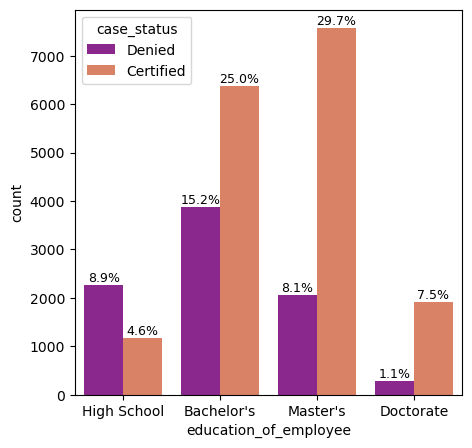

In [45]:
#create a plot of the data above, but additionally with the percent of each group within the total number of cases
labeled_barplot(df,'education_of_employee','case_status', order=["High School","Bachelor's","Master's","Doctorate"],perc=True)

* As the graph aboves shows, the ratio of applications being certified versus denied increases considerably as an applicant's highest level of education achieved increases.
* The ratio of an applicant with a high school diploma being approved versus denied is ~1:2, whereas the same ratio for an applicant with a doctorate is ~7:1.

#### 2. How does the visa status vary across different continents?

In [46]:
#group data by continent and count the numbers of each case_status for each category
df.groupby('continent')['case_status'].value_counts()

continent      case_status
Africa         Certified        397
               Denied           154
Asia           Certified      11012
               Denied          5849
Europe         Certified       2957
               Denied           775
North America  Certified       2037
               Denied          1255
Oceania        Certified        122
               Denied            70
South America  Certified        493
               Denied           359
Name: count, dtype: int64

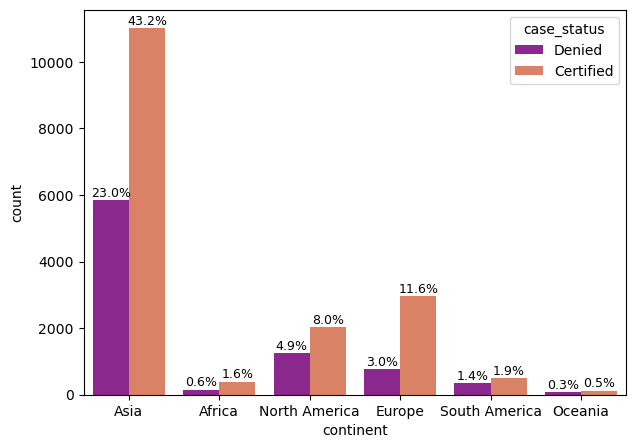

In [47]:
#create a plot of the data above, but additionally with the percent of each group within the total number of cases
labeled_barplot(df,'continent','case_status', order=None, perc=True)

* Applicants from Asia comprise ~2/3 of all applications and these applicants have almost a 2:1 ratio of approvals to denials.
* An application from a European applicant has the best ratio of approvals to denials (~4:1).

### 3.In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

In [48]:
#group data by unit_of_wage and count the numbers of each case_status for each category
df.groupby('unit_of_wage')['case_status'].value_counts()

unit_of_wage  case_status
Hour          Denied          1410
              Certified        747
Month         Certified         55
              Denied            34
Week          Certified        169
              Denied           103
Year          Certified      16047
              Denied          6915
Name: count, dtype: int64

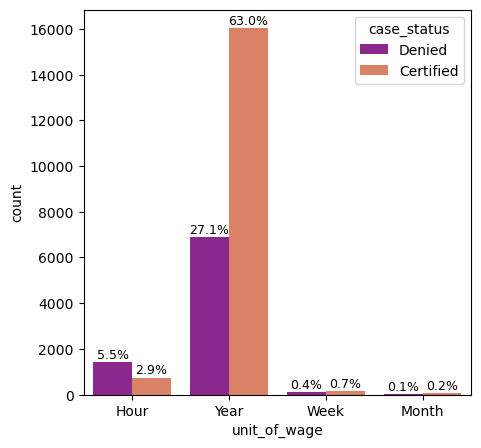

In [49]:
#create a plot of the data above, but additionally with the percent of each group within the total number of cases
labeled_barplot(df,'unit_of_wage','case_status', order=None, perc=True)

* Applicants who are applying to work in a job with an hourly rate have a ratio of approved versus denied applications of ~1:2. Additionally, these applicants comprise only ~8% of all applications, but comprise ~17% of all denials.
* Applicants from any other unit_of_wage category have a ratio of ~2:1, with applications for jobs with annual salaries showing nearly a 2.5:1 ratio of approvals to denials.

### 4.Does Region of employment influence visa status?

In [50]:
#group data by region of employment and count the numbers of each case_status for each category
df.groupby('region_of_employment')['case_status'].value_counts()

region_of_employment  case_status
Island                Certified       226
                      Denied          149
Midwest               Certified      3253
                      Denied         1054
Northeast             Certified      4526
                      Denied         2669
South                 Certified      4913
                      Denied         2104
West                  Certified      4100
                      Denied         2486
Name: count, dtype: int64

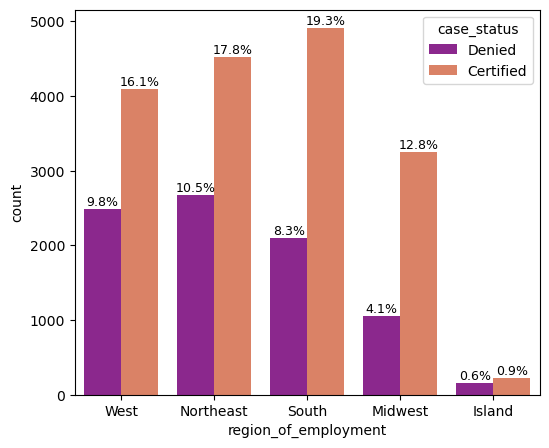

In [51]:
labeled_barplot(df,'region_of_employment','case_status', order=None, perc=True)

* The majority of cases (16.1%) in the West region were certified, while 9.8% were denied.
* The Northeast also shows a higher proportion of certified cases (17.8%) compared to 10.5% being denied
* The South has the highest percentage of certified cases at 19.3%, with only 8.3% of cases denied.
* The Midwest has a lower total number of cases, with 12.8% certified and 4.1% denied.
* The Island region has the fewest cases overall, with a slight difference between certified (0.9%) and denied (0.6%).

#### The South region has the highest certification rate, while the Midwest has the lowest certification percentage compared to other mainland regions.
#### Islands account for the smallest share of employment cases, both certified and denied.

### 5. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

In [52]:
#group data by has_job_experience and count the numbers of each case_status for each category
df.groupby('has_job_experience')['case_status'].value_counts()

has_job_experience  case_status
N                   Certified       5994
                    Denied          4684
Y                   Certified      11024
                    Denied          3778
Name: count, dtype: int64

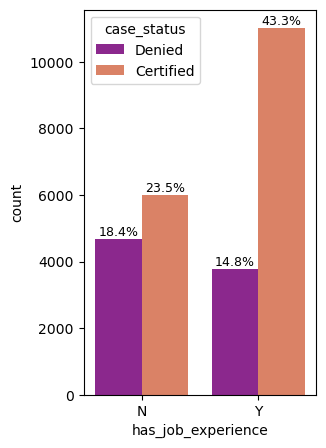

In [53]:
#create a plot of the data above, but additionally with the percent of each group within the total number of cases
labeled_barplot(df,'has_job_experience','case_status', order=None, perc=True)

* Applicants with job experience have a ratio of approved to denied applications of ~3:1, whereas the same ratio for applicants without job experience have around a 5:4 ratio (i.e., approximately equivalent).

## Data Preprocessing

In [54]:
df1=df.copy()

In [55]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

#### a) Treatment of Missing Values
Based on the initial evaluations, no values were missing in any of the columns. However, there were rows with unrealistic non-positive (<0) values of no_of_employees. To address this problem, these values are replaced with the median of no_of_employees.

- We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

### b) Feature Engineering

* The feature yr_of_estab is converted to yrs_snc_estab, containing the years since establishment. 
* The columns yr_of_estab is dropped subsequently.

In [56]:
# Add a new column, yrs_snc_estab, including years since establishment - final year is 2016, when data is gathered
df1["yrs_snc_estab"] = 2016 - df1.yr_of_estab
print(df1.yrs_snc_estab)

0          9
1         14
2          8
3        119
4         11
        ... 
25475      8
25476     10
25477    106
25478    129
25479     56
Name: yrs_snc_estab, Length: 25480, dtype: int64


In [57]:
df1.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,yrs_snc_estab
0,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied,9
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified,14
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied,8
3,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied,119
4,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified,11


In [58]:
# Drop yr_of_estab
df1.drop("yr_of_estab", axis=1, inplace=True)

In [59]:
# Check sample rows of updated data
df1.sample(10, random_state=1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,yrs_snc_estab
17639,Asia,Bachelor's,Y,N,567,Midwest,26842.910,Year,Y,Certified,24
23951,Oceania,Bachelor's,N,N,619,Midwest,66419.980,Year,Y,Certified,78
8625,Asia,Master's,N,N,2635,South,887.292,Hour,Y,Certified,11
20206,Asia,Bachelor's,Y,Y,3184,Northeast,49435.800,Year,Y,Certified,30
7471,Europe,Bachelor's,Y,N,4681,West,49865.190,Year,Y,Denied,88
3433,Asia,Bachelor's,Y,N,222,South,813.726,Hour,Y,Certified,27
24440,Europe,High School,N,Y,3278,South,204948.390,Year,Y,Denied,22
12104,Asia,Master's,Y,N,1359,West,202237.040,Year,N,Certified,19
15656,Asia,Bachelor's,N,N,2081,West,111713.020,Year,Y,Denied,13
23110,North America,Bachelor's,Y,N,854,Northeast,444.826,Hour,Y,Denied,18


In [60]:
# Check statistical summary of numeric data in updated data
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270
yrs_snc_estab,25480.000,36.590,42.367,0.000,11.000,19.000,40.000,216.000


* The mean and median values of yrs_snc_estab are ~37 and 19 years, respectively. The oldest employer was established 216 years before the data collection.
* The minimum and maximum values of hourly_wage are 0.05 and ~7004 (probably in dollars), respectively, so the variation of this variable is very large. The mean hourly wage is ~95.

In [61]:
# Identify rows with non-positive no_of_employees
neg_employee_no_rows = df1.no_of_employees <= 0

# Print number of rows with non-positive no_of_employees
print(
    f"There are {neg_employee_no_rows.sum()} rows with non-positive number of employees."
)

# Replace negative values in column no_of_employees with its median
df1.loc[neg_employee_no_rows, "no_of_employees"] = df1.no_of_employees.median()

# Double-check minimum value of no_of_employees
print(f"The new minimum number of employees is {df1.no_of_employees.min()}.")

There are 33 rows with non-positive number of employees.
The new minimum number of employees is 12.


c) Detection and Treatment of Outliers

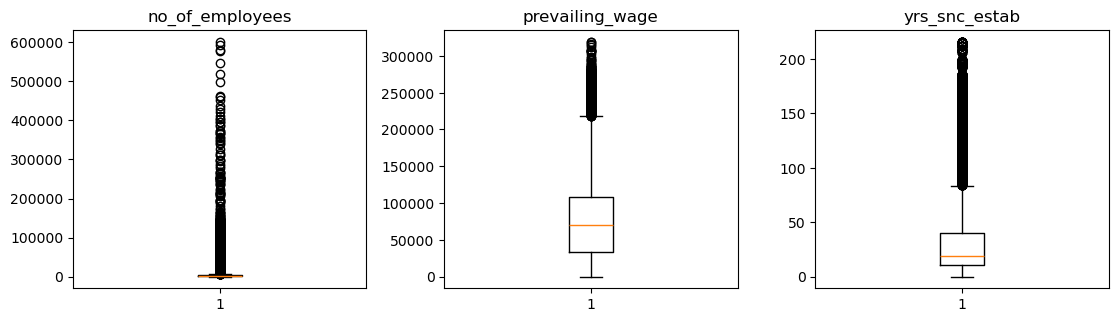

In [62]:
#Outlier detection using boxplot
numerical_cols = df1.select_dtypes(include=np.number).columns.tolist()

#Formula for outlier detection
plt.figure(figsize=(15,12))

for i, variable in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    plt.boxplot(df1[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for Modeling

####  Encoding Categorical Data

* Encoding the values in the columns continent, has_job_experience, requires_job_training, full_time_position, region_of_employment, case_status, unit_of_wage and education_of_employee

In [63]:
# we need to pass numerical values for each categorical column for imputation so we will label encode them
continent = {
    "Asia":0,
    "Europe":1,
    "North America":2,
    "South America":3,
    "Africa":4,
    "Oceania":5
}
df1["continent"] = df1["continent"].map(continent)

has_job_experience = {"Y": 1, "N": 0}
df1["has_job_experience"] = df1["has_job_experience"].map(has_job_experience)

requires_job_training = {"Y": 1, "N": 0}
df1["requires_job_training"] = df1["requires_job_training"].map(requires_job_training)

education_of_employee= {
    "High School": 0,
    "Bachelor's": 1,
    "Master's": 2,
    "Doctorate": 3
   
}

df1["education_of_employee"] = df1["education_of_employee"].map(education_of_employee)



full_time_position = {"Y": 1, "N": 0}
df1["full_time_position"] = df1["full_time_position"].map(full_time_position)

region_of_employment = {
    "Island":0,
    "Midwest":1,
    "Northeast":2,
    "South":3,
    "West":4
}
df1["region_of_employment"] = df1["region_of_employment"].map(region_of_employment)

unit_of_wage = {
    "Hour": 0,
    "Week": 1,
    "Month": 2,
    "Year": 3

}
df1["unit_of_wage"] = df1["unit_of_wage"].map(unit_of_wage)



In [64]:
df1.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,yrs_snc_estab
0,0,0,0,0,14513,4,592.203,0,1,Denied,9
1,0,2,1,0,2412,2,83425.650,3,1,Certified,14
2,0,1,0,1,44444,4,122996.860,3,1,Denied,8
3,0,1,0,0,98,4,83434.030,3,1,Denied,119
4,4,2,1,0,1082,3,149907.390,3,1,Certified,11


#### Separation of independent and dependent variable

In [65]:
X = df1.drop(["case_status"], axis=1)
y = df1["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [66]:
print(y.value_counts())

case_status
1    17018
0     8462
Name: count, dtype: int64


####  Splitting Data into Training, validation and Test Sets

In [67]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 10) (5096, 10) (5096, 10)


In [68]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 15288
Number of rows in validation data = 5096
Number of rows in test data = 5096


### Missing Value Treatment

In [69]:
df1.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
yrs_snc_estab            0
dtype: int64

In [70]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Get list of categorical and numerical columns
cat_cols = list(X_train.select_dtypes(include='object').columns)
num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)

# Check if categorical columns exist and impute
if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
    X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
    X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Check if numerical columns exist and impute
if len(num_cols) > 0:
    num_imputer = SimpleImputer(strategy='mean')
    X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
    X_val[num_cols] = num_imputer.transform(X_val[num_cols])
    X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [71]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
yrs_snc_estab            0
dtype: int64
------------------------------
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
yrs_snc_estab            0
dtype: int64
------------------------------
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
yrs_snc_estab            0
dtype: int64


* All missing values have been treated.
* Let's inverse map the encoded values.

### Reverse Mapping for Encoded Variables

In [72]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [73]:
inverse_mapping(continent,"continent")
inverse_mapping(has_job_experience, "has_job_experience")
inverse_mapping(requires_job_training, "requires_job_training")
inverse_mapping(education_of_employee, "education_of_employee")
inverse_mapping(full_time_position, "full_time_position")
inverse_mapping(region_of_employment, "region_of_employment")
inverse_mapping(unit_of_wage, "unit_of_wage")


#### `Train Dataset`

In [74]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

continent
Asia             10085
Europe            2285
North America     1944
South America      528
Africa             333
Oceania            113
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     6141
Master's       5792
High School    2045
Doctorate      1310
Name: count, dtype: int64
******************************
has_job_experience
Y    8845
N    6443
Name: count, dtype: int64
******************************
requires_job_training
N    13477
Y     1811
Name: count, dtype: int64
******************************
region_of_employment
Northeast    4312
South        4248
West         3920
Midwest      2576
Island        232
Name: count, dtype: int64
******************************
unit_of_wage
Year     13786
Hour      1286
Week       156
Month       60
Name: count, dtype: int64
******************************
full_time_position
Y    13678
N     1610
Name: count, dtype: int64
******************************


#### `Validation Dataset`

In [75]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

continent
Asia             3395
Europe            713
North America     655
South America     173
Africa            121
Oceania            39
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2033
Master's       1886
High School     694
Doctorate       483
Name: count, dtype: int64
******************************
has_job_experience
Y    2963
N    2133
Name: count, dtype: int64
******************************
requires_job_training
N    4501
Y     595
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1430
South        1389
West         1352
Midwest       855
Island         70
Name: count, dtype: int64
******************************
unit_of_wage
Year     4576
Hour      452
Week       57
Month      11
Name: count, dtype: int64
******************************
full_time_position
Y    4552
N     544
Name: count, dtype: int64
******************************


#### `Test Dataset`

In [76]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

continent
Asia             3381
Europe            734
North America     693
South America     151
Africa             97
Oceania            40
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2060
Master's       1956
High School     681
Doctorate       399
Name: count, dtype: int64
******************************
has_job_experience
Y    2994
N    2102
Name: count, dtype: int64
******************************
requires_job_training
N    4547
Y     549
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1453
South        1380
West         1314
Midwest       876
Island         73
Name: count, dtype: int64
******************************
unit_of_wage
Year     4600
Hour      419
Week       59
Month      18
Name: count, dtype: int64
******************************
full_time_position
Y    4543
N     553
Name: count, dtype: int64
******************************


* Inverse mapping returned original labels.

### Creating Dummy Variables

In [77]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 21) (5096, 21) (5096, 21)


* After encoding there are 21 columns.

# Model Building

## Model evaluation criterion

**Model can make wrong predictions as:**
1. Predicting an applicant visa should be certified but in reality, the applicant visa is denied. 
2. Predicting an applicant visa should be denied but in reality, the applicant visa is certified. 

**Which case is more important?**
* Both are important:
If an applicant is approved when they would have been denied, an unqualified employee will get a job that should have been filled by a US citizen.
If an applicant is denied when they should have been approved, U.S. companies will not be able to fill critical positions and the overall economy will not be as productive.
**How to reduce this losses?
* As the process of reviewing each application is time and resource-intensive, this model should identify those candidates predicted to be approved, so agents can prioritize these applications.
* F1 Score can be used a the metric for evaluation of the model, as the greater the F1 score, the higher the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights, where applicable, so that model focuses equally on both classes.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [78]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [79]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Initial Model Building

### Model Building - Original Data


Training Performance and Confusion Matrix:

Bagging (Training): Recall: 0.9887, Precision: 0.9906, F1 Score: 0.9897, Accuracy: 0.9862
Bagging (Validation): Recall: 0.7738, Precision: 0.7713, F1 Score: 0.7725, Accuracy: 0.6956


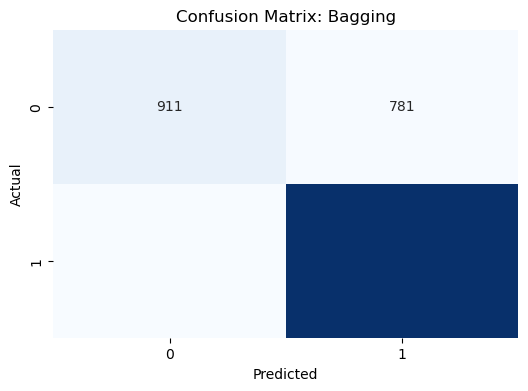

Random forest (Training): Recall: 1.0000, Precision: 1.0000, F1 Score: 1.0000, Accuracy: 1.0000
Random forest (Validation): Recall: 0.8381, Precision: 0.7688, F1 Score: 0.8020, Accuracy: 0.7235


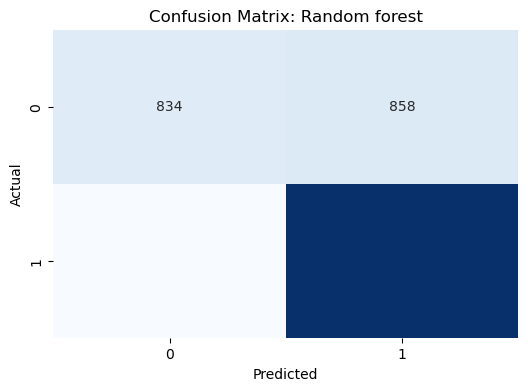

GBM (Training): Recall: 0.8805, Precision: 0.7830, F1 Score: 0.8289, Accuracy: 0.7573
GBM (Validation): Recall: 0.8731, Precision: 0.7831, F1 Score: 0.8257, Accuracy: 0.7537


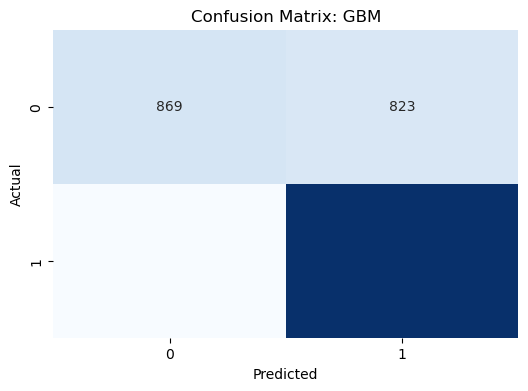

Adaboost (Training): Recall: 0.8877, Precision: 0.7606, F1 Score: 0.8192, Accuracy: 0.7384
Adaboost (Validation): Recall: 0.8787, Precision: 0.7603, F1 Score: 0.8152, Accuracy: 0.7339


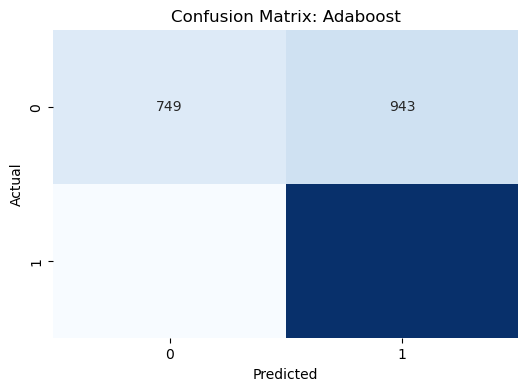

dtree (Training): Recall: 1.0000, Precision: 1.0000, F1 Score: 1.0000, Accuracy: 1.0000
dtree (Validation): Recall: 0.7415, Precision: 0.7417, F1 Score: 0.7416, Accuracy: 0.6548


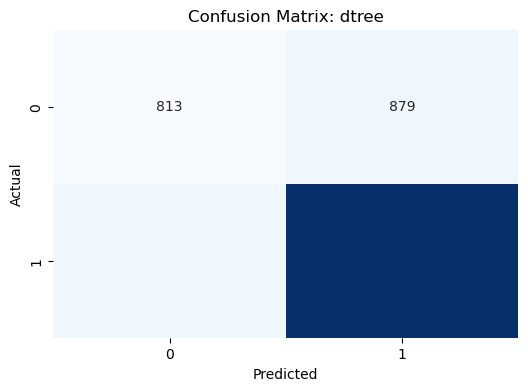

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

# Plot confusion matrix for validation
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {title}')
    plt.show()

# Training performance and validation performance
print("\nTraining Performance and Confusion Matrix:\n")
for name, model in models:
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Metrics for Training
    recall_train = recall_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    
    # Metrics for Validation
    recall_val = recall_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)

    print(f"{name} (Training): Recall: {recall_train:.4f}, Precision: {precision_train:.4f}, F1 Score: {f1_train:.4f}, Accuracy: {accuracy_train:.4f}")
    print(f"{name} (Validation): Recall: {recall_val:.4f}, Precision: {precision_val:.4f}, F1 Score: {f1_val:.4f}, Accuracy: {accuracy_val:.4f}")

    # Plot Confusion Matrix for Validation
    plot_confusion_matrix(y_val, y_val_pred, name)


Training and Validation Performance Difference:

Bagging:
  Recall      -> Training: 0.9887, Validation: 0.7738, Difference: 0.2149
  Precision   -> Training: 0.9906, Validation: 0.7713, Difference: 0.2193
  F1 Score    -> Training: 0.9897, Validation: 0.7725, Difference: 0.2171
  Accuracy    -> Training: 0.9862, Validation: 0.6956, Difference: 0.2906



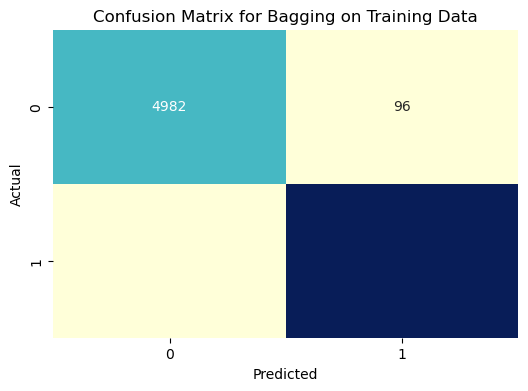

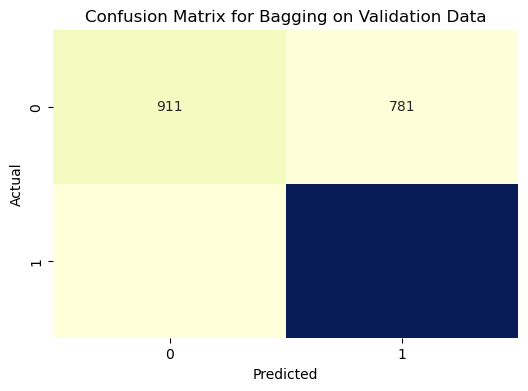

Random forest:
  Recall      -> Training: 1.0000, Validation: 0.8381, Difference: 0.1619
  Precision   -> Training: 1.0000, Validation: 0.7688, Difference: 0.2312
  F1 Score    -> Training: 1.0000, Validation: 0.8020, Difference: 0.1980
  Accuracy    -> Training: 1.0000, Validation: 0.7235, Difference: 0.2765



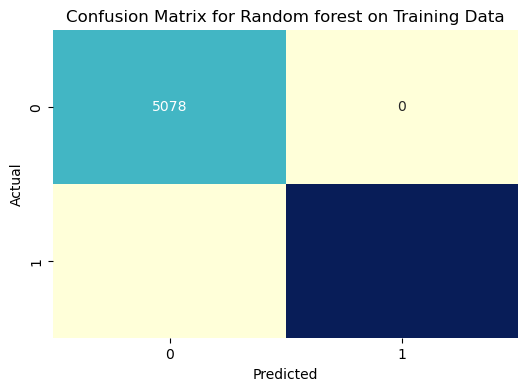

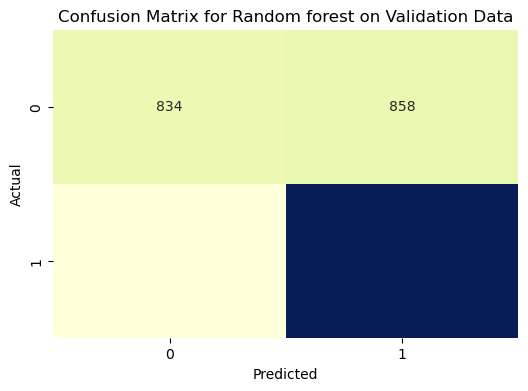

GBM:
  Recall      -> Training: 0.8805, Validation: 0.8731, Difference: 0.0074
  Precision   -> Training: 0.7830, Validation: 0.7831, Difference: -0.0001
  F1 Score    -> Training: 0.8289, Validation: 0.8257, Difference: 0.0032
  Accuracy    -> Training: 0.7573, Validation: 0.7537, Difference: 0.0035



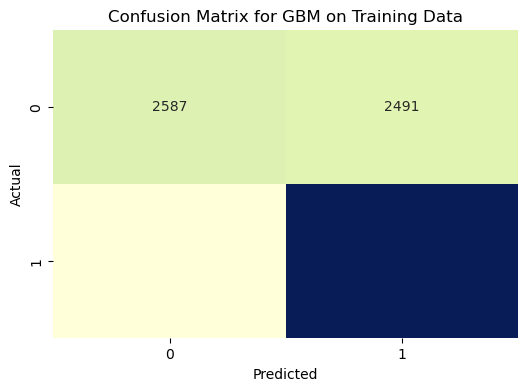

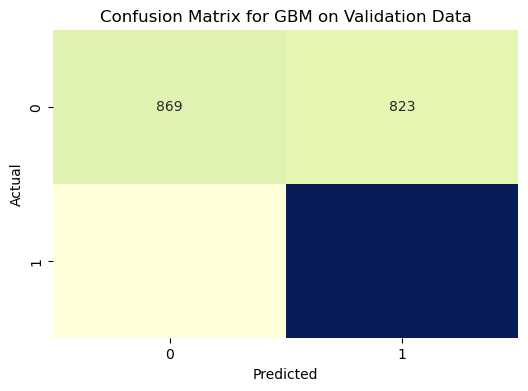

Adaboost:
  Recall      -> Training: 0.8877, Validation: 0.8787, Difference: 0.0090
  Precision   -> Training: 0.7606, Validation: 0.7603, Difference: 0.0003
  F1 Score    -> Training: 0.8192, Validation: 0.8152, Difference: 0.0040
  Accuracy    -> Training: 0.7384, Validation: 0.7339, Difference: 0.0044



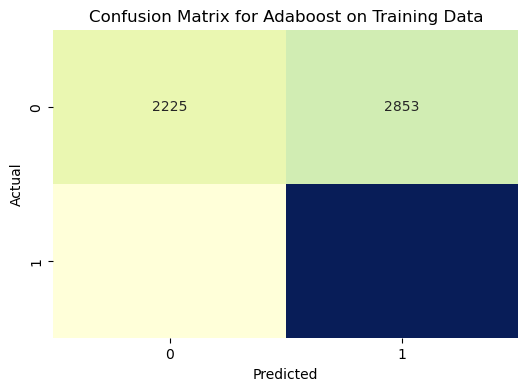

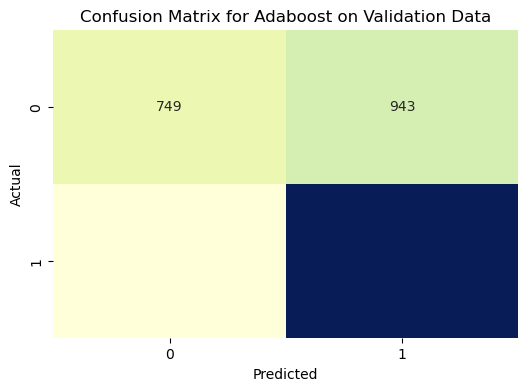

dtree:
  Recall      -> Training: 1.0000, Validation: 0.7415, Difference: 0.2585
  Precision   -> Training: 1.0000, Validation: 0.7417, Difference: 0.2583
  F1 Score    -> Training: 1.0000, Validation: 0.7416, Difference: 0.2584
  Accuracy    -> Training: 1.0000, Validation: 0.6548, Difference: 0.3452



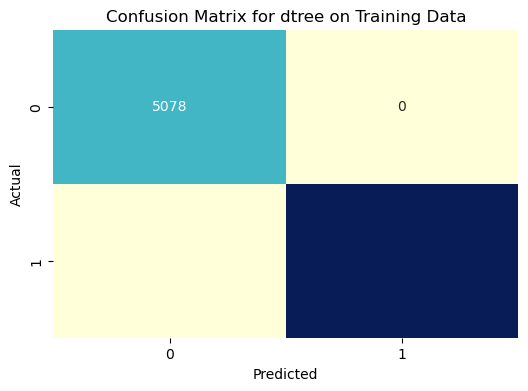

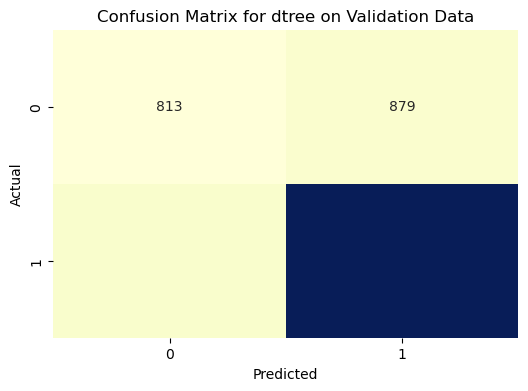

In [81]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, dataset_type):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
    plt.title(f'Confusion Matrix for {model_name} on {dataset_type} Data')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

print("\nTraining and Validation Performance Difference:\n")

# Loop over each model
for name, model in models:
    # Fit model on training data
    model.fit(X_train, y_train)
    
    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Metrics for Training
    recall_train = recall_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    
    # Metrics for Validation
    recall_val = recall_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)
    
    # Differences between Training and Validation metrics
    recall_diff = recall_train - recall_val
    precision_diff = precision_train - precision_val
    f1_diff = f1_train - f1_val
    accuracy_diff = accuracy_train - accuracy_val
    
    # Print the differences
    print(f"{name}:")
    print(f"  Recall      -> Training: {recall_train:.4f}, Validation: {recall_val:.4f}, Difference: {recall_diff:.4f}")
    print(f"  Precision   -> Training: {precision_train:.4f}, Validation: {precision_val:.4f}, Difference: {precision_diff:.4f}")
    print(f"  F1 Score    -> Training: {f1_train:.4f}, Validation: {f1_val:.4f}, Difference: {f1_diff:.4f}")
    print(f"  Accuracy    -> Training: {accuracy_train:.4f}, Validation: {accuracy_val:.4f}, Difference: {accuracy_diff:.4f}\n")
    
    # Confusion Matrix for Training set
    cm_train = confusion_matrix(y_train, y_train_pred)
    plot_confusion_matrix(cm_train, name, "Training")
    
    # Confusion Matrix for Validation set
    cm_val = confusion_matrix(y_val, y_val_pred)
    plot_confusion_matrix(cm_val, name, "Validation")

* GBM has the best performance followed by AdaBoost model as per the validation performance

### Model Building - Oversampled Data

In [82]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 21)
After Oversampling, the shape of train_y: (20420,) 




Training and Validation Performance:

Bagging:
  Training - Recall: 0.9833, Precision: 0.9919, F1: 0.9876, Accuracy: 0.9876
  Validation - Recall: 0.7591, Precision: 0.7797, F1: 0.7693, Accuracy: 0.6958


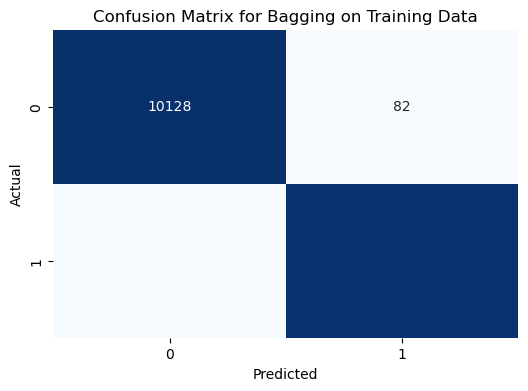

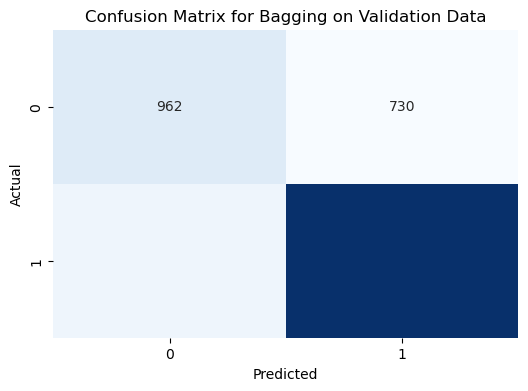


Random forest:
  Training - Recall: 0.9999, Precision: 0.9999, F1: 0.9999, Accuracy: 0.9999
  Validation - Recall: 0.8111, Precision: 0.7797, F1: 0.7951, Accuracy: 0.7208


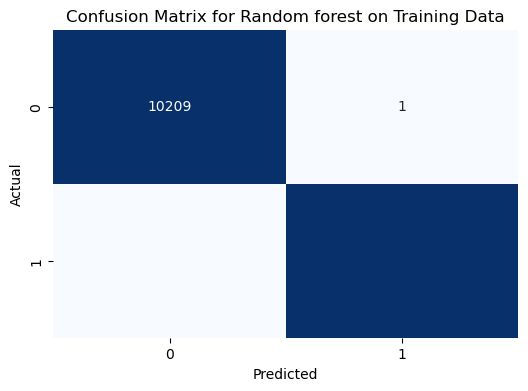

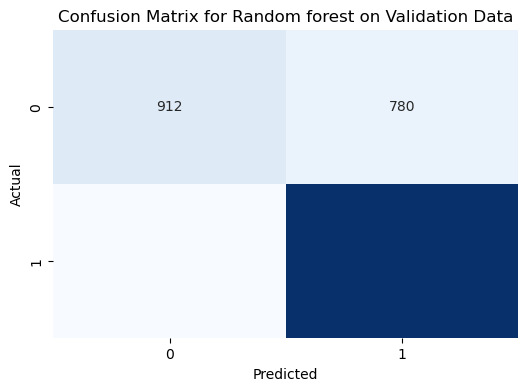


GBM:
  Training - Recall: 0.8495, Precision: 0.7674, F1: 0.8063, Accuracy: 0.7960
  Validation - Recall: 0.8440, Precision: 0.7912, F1: 0.8168, Accuracy: 0.7471


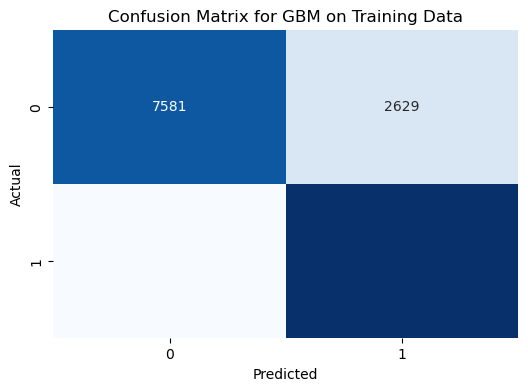

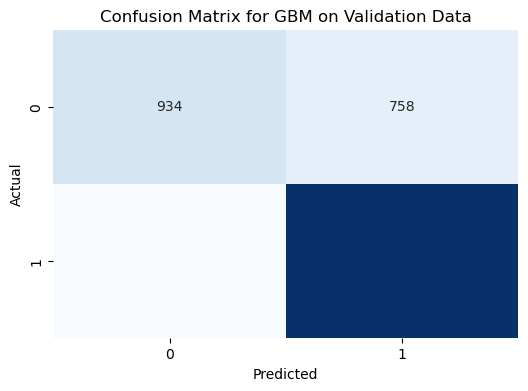


Adaboost:
  Training - Recall: 0.8623, Precision: 0.7481, F1: 0.8011, Accuracy: 0.7859
  Validation - Recall: 0.8622, Precision: 0.7746, F1: 0.8161, Accuracy: 0.7404


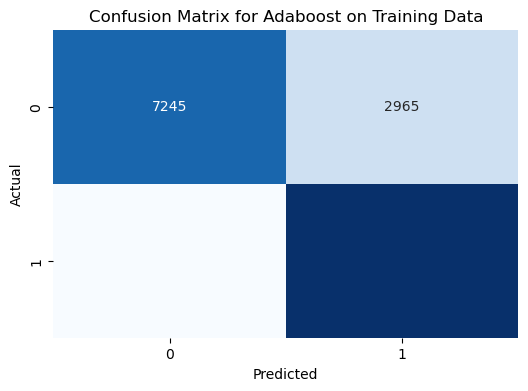

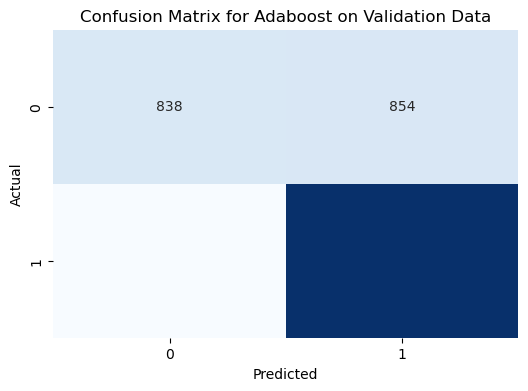


dtree:
  Training - Recall: 1.0000, Precision: 1.0000, F1: 1.0000, Accuracy: 1.0000
  Validation - Recall: 0.7092, Precision: 0.7497, F1: 0.7289, Accuracy: 0.6476


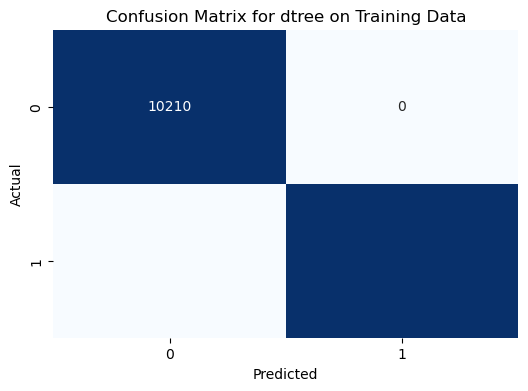

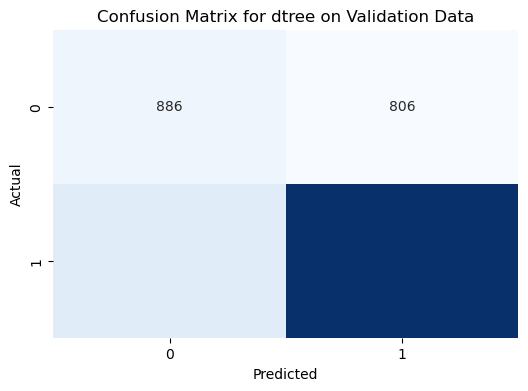

In [83]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, dataset_type):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for {model_name} on {dataset_type} Data')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Empty list to store the models
models = []

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

# Training and evaluating the models
print("\nTraining and Validation Performance:")

for name, model in models:
    # Fit the model on oversampled training data
    model.fit(X_train_over, y_train_over)

    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train_over)
    y_val_pred = model.predict(X_val)

    # Metrics for training set
    recall_train = recall_score(y_train_over, y_train_pred)
    precision_train = precision_score(y_train_over, y_train_pred)
    f1_train = f1_score(y_train_over, y_train_pred)
    accuracy_train = accuracy_score(y_train_over, y_train_pred)

    # Metrics for validation set
    recall_val = recall_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)

    # Print metrics
    print(f"\n{name}:")
    print(f"  Training - Recall: {recall_train:.4f}, Precision: {precision_train:.4f}, F1: {f1_train:.4f}, Accuracy: {accuracy_train:.4f}")
    print(f"  Validation - Recall: {recall_val:.4f}, Precision: {precision_val:.4f}, F1: {f1_val:.4f}, Accuracy: {accuracy_val:.4f}")
    
    # Confusion Matrix for Training set
    cm_train = confusion_matrix(y_train_over, y_train_pred)
    plot_confusion_matrix(cm_train, name, "Training")

    # Confusion Matrix for Validation set
    cm_val = confusion_matrix(y_val, y_val_pred)
    plot_confusion_matrix(cm_val, name, "Validation")


Training and Validation Performance Difference:

Bagging:
  Recall      -> Training: 0.9833, Validation: 0.7591, Difference: 0.2241
  Precision   -> Training: 0.9919, Validation: 0.7797, Difference: 0.2122
  F1 Score    -> Training: 0.9876, Validation: 0.7693, Difference: 0.2183
  Accuracy    -> Training: 0.9876, Validation: 0.6958, Difference: 0.2918



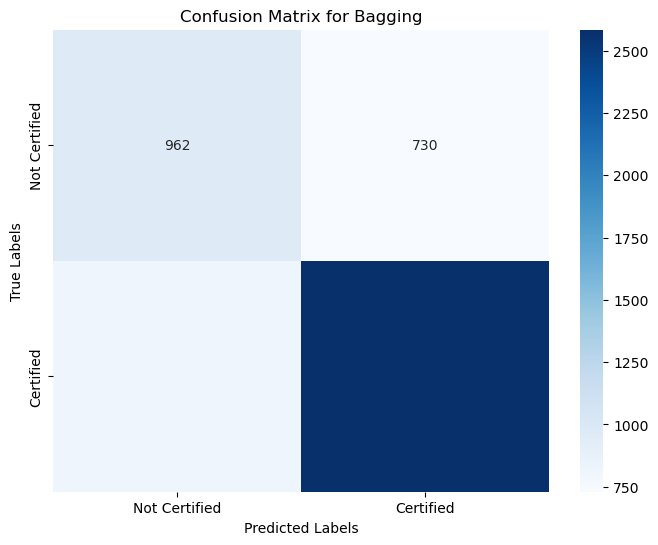

Random forest:
  Recall      -> Training: 0.9999, Validation: 0.8111, Difference: 0.1888
  Precision   -> Training: 0.9999, Validation: 0.7797, Difference: 0.2202
  F1 Score    -> Training: 0.9999, Validation: 0.7951, Difference: 0.2048
  Accuracy    -> Training: 0.9999, Validation: 0.7208, Difference: 0.2791



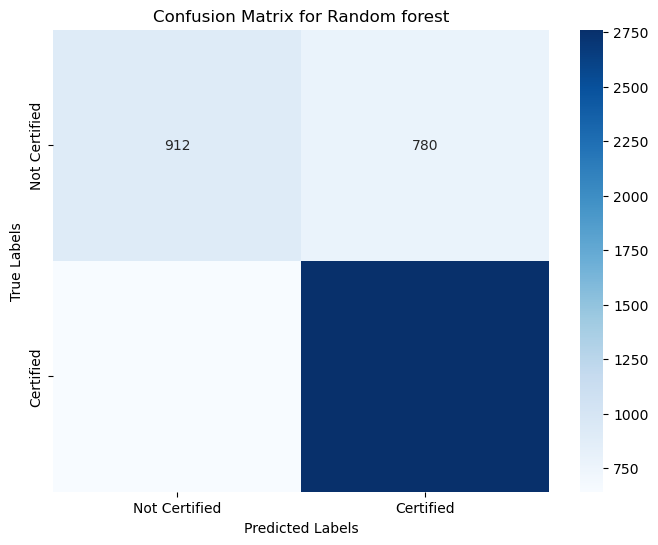

GBM:
  Recall      -> Training: 0.8495, Validation: 0.8440, Difference: 0.0055
  Precision   -> Training: 0.7674, Validation: 0.7912, Difference: -0.0239
  F1 Score    -> Training: 0.8063, Validation: 0.8168, Difference: -0.0104
  Accuracy    -> Training: 0.7960, Validation: 0.7471, Difference: 0.0489



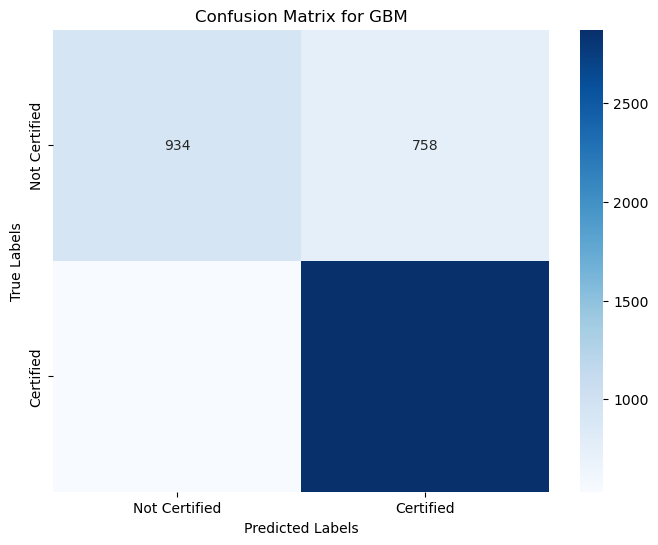

Adaboost:
  Recall      -> Training: 0.8623, Validation: 0.8622, Difference: 0.0001
  Precision   -> Training: 0.7481, Validation: 0.7746, Difference: -0.0265
  F1 Score    -> Training: 0.8011, Validation: 0.8161, Difference: -0.0149
  Accuracy    -> Training: 0.7859, Validation: 0.7404, Difference: 0.0456



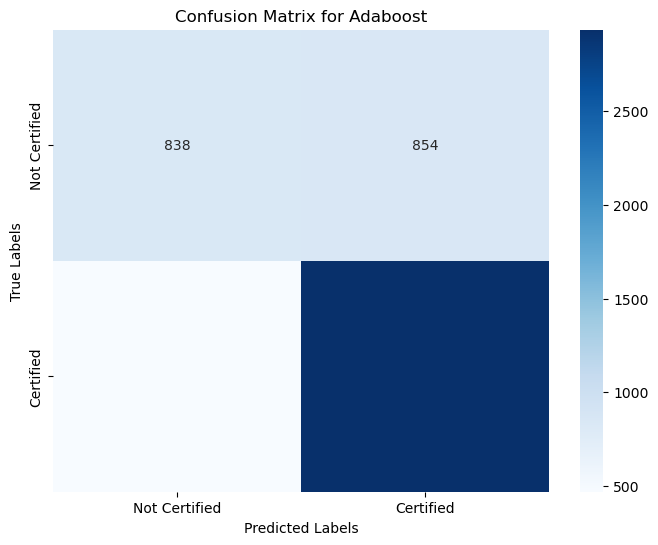

dtree:
  Recall      -> Training: 1.0000, Validation: 0.7092, Difference: 0.2908
  Precision   -> Training: 1.0000, Validation: 0.7497, Difference: 0.2503
  F1 Score    -> Training: 1.0000, Validation: 0.7289, Difference: 0.2711
  Accuracy    -> Training: 1.0000, Validation: 0.6476, Difference: 0.3524



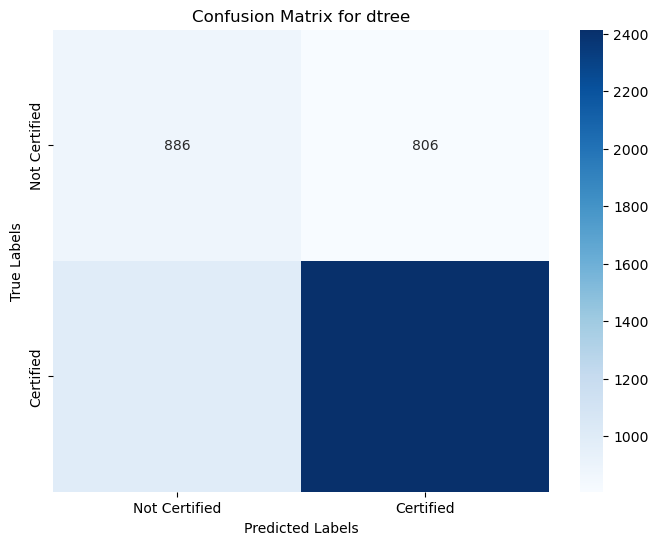

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix

print("\nTraining and Validation Performance Difference:\n")

# Loop over each model
for name, model in models:
    # Fit the model on oversampled training data
    model.fit(X_train_over, y_train_over)
    
    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train_over)
    y_val_pred = model.predict(X_val)
    
    # Metrics for Training
    recall_train = recall_score(y_train_over, y_train_pred)
    precision_train = precision_score(y_train_over, y_train_pred)
    f1_train = f1_score(y_train_over, y_train_pred)
    accuracy_train = accuracy_score(y_train_over, y_train_pred)
    
    # Metrics for Validation
    recall_val = recall_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)
    
    # Differences between Training and Validation metrics
    recall_diff = recall_train - recall_val
    precision_diff = precision_train - precision_val
    f1_diff = f1_train - f1_val
    accuracy_diff = accuracy_train - accuracy_val
    
    # Print the differences
    print(f"{name}:")
    print(f"  Recall      -> Training: {recall_train:.4f}, Validation: {recall_val:.4f}, Difference: {recall_diff:.4f}")
    print(f"  Precision   -> Training: {precision_train:.4f}, Validation: {precision_val:.4f}, Difference: {precision_diff:.4f}")
    print(f"  F1 Score    -> Training: {f1_train:.4f}, Validation: {f1_val:.4f}, Difference: {f1_diff:.4f}")
    print(f"  Accuracy    -> Training: {accuracy_train:.4f}, Validation: {accuracy_val:.4f}, Difference: {accuracy_diff:.4f}\n")
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Certified', 'Certified'], yticklabels=['Not Certified', 'Certified'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

* Adaboost has the best performance on validation followed by GBM


### Model Building - Undersampled Data

In [85]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [86]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 




Training Performance:

Bagging - Training:
  Recall: 0.9703, Precision: 0.9921, F1 Score: 0.9811, Accuracy: 0.9813


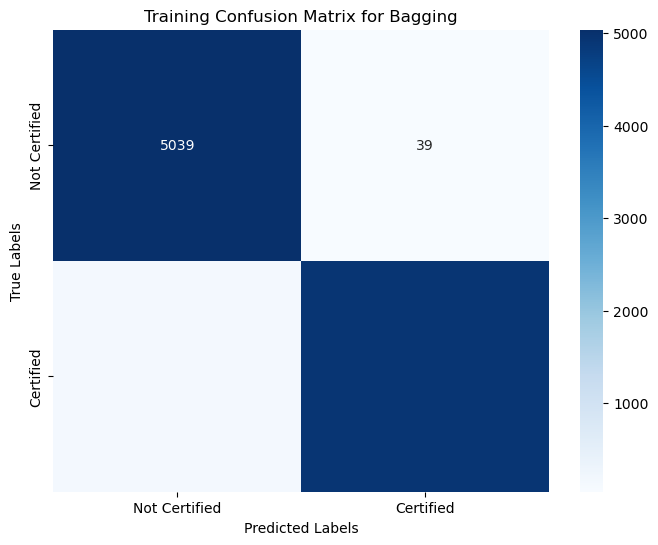

Random forest - Training:
  Recall: 1.0000, Precision: 1.0000, F1 Score: 1.0000, Accuracy: 1.0000


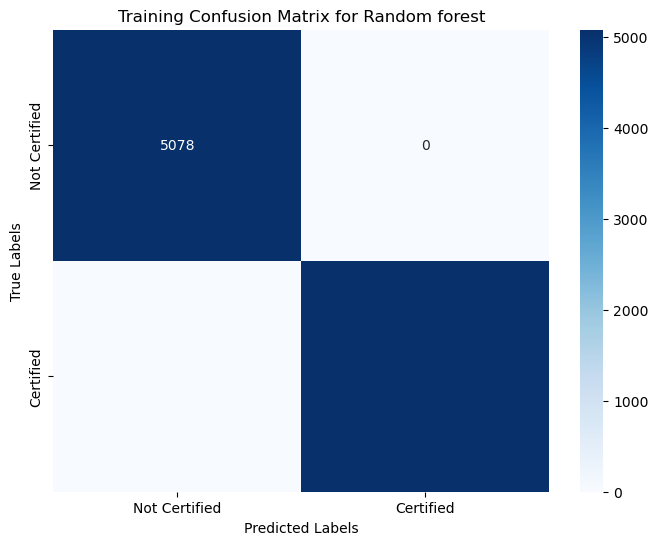

GBM - Training:
  Recall: 0.7468, Precision: 0.7085, F1 Score: 0.7271, Accuracy: 0.7198


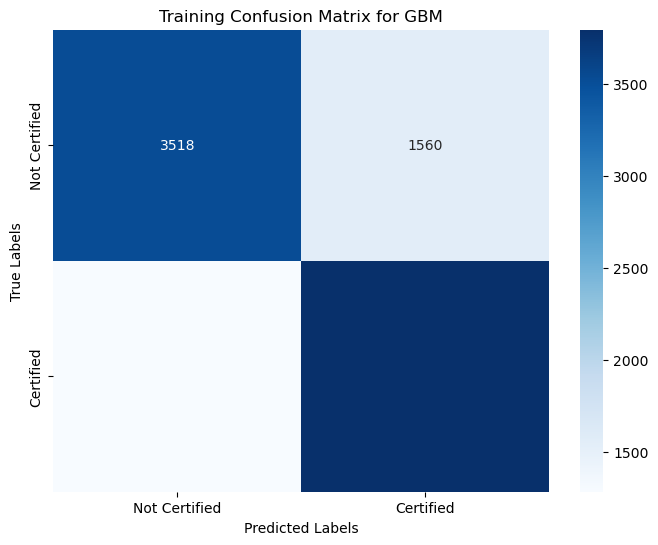

Adaboost - Training:
  Recall: 0.7182, Precision: 0.6936, F1 Score: 0.7057, Accuracy: 0.7005


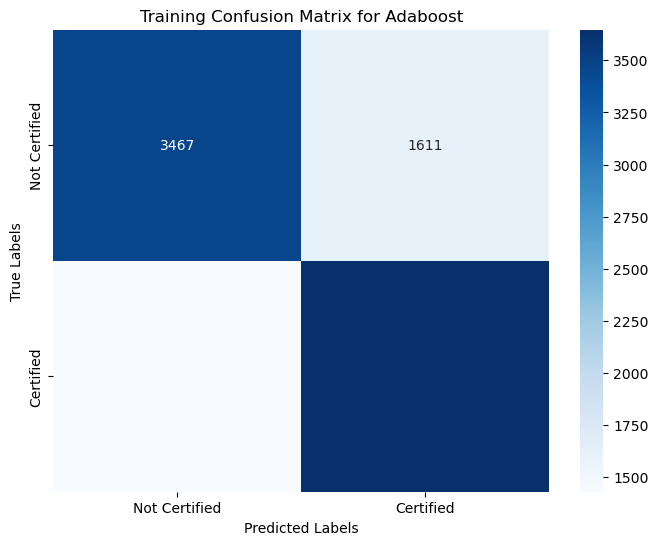

dtree - Training:
  Recall: 1.0000, Precision: 1.0000, F1 Score: 1.0000, Accuracy: 1.0000


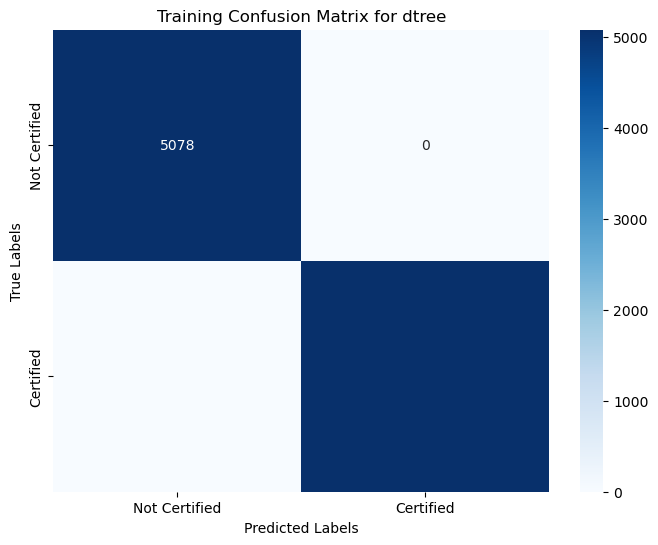


Validation Performance:

Bagging - Validation:
  Recall: 0.6093, Precision: 0.8289, F1 Score: 0.7023, Accuracy: 0.6550


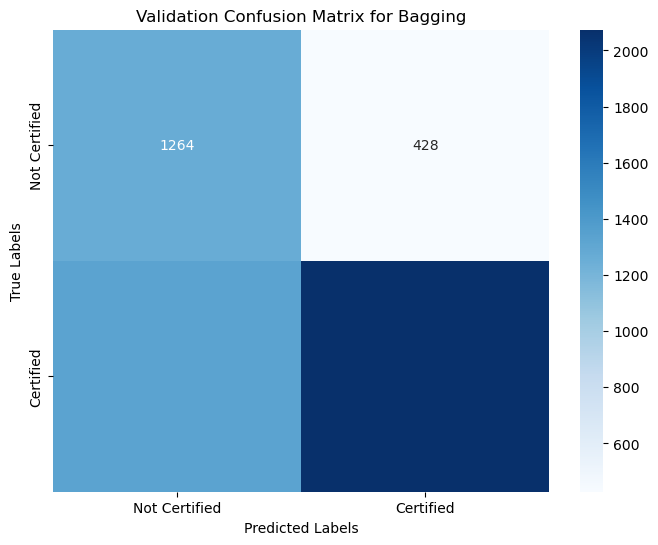

Random forest - Validation:
  Recall: 0.6789, Precision: 0.8224, F1 Score: 0.7438, Accuracy: 0.6876


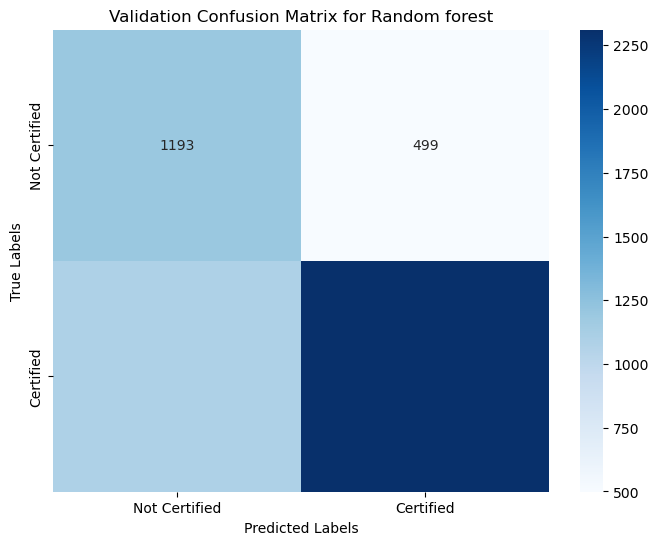

GBM - Validation:
  Recall: 0.7306, Precision: 0.8293, F1 Score: 0.7768, Accuracy: 0.7196


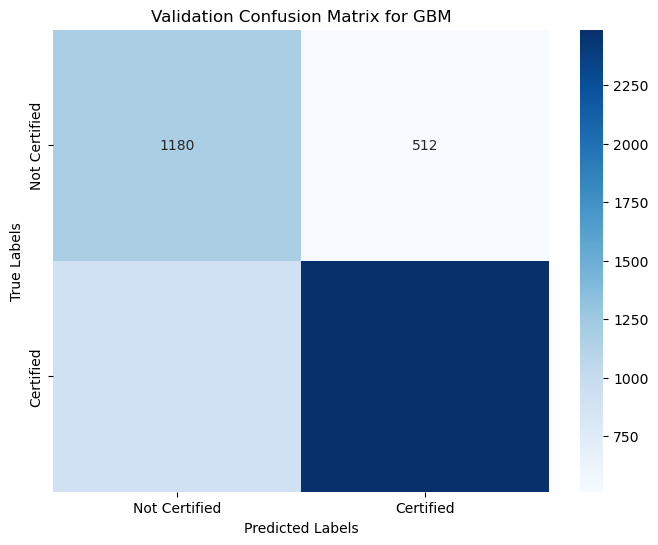

Adaboost - Validation:
  Recall: 0.7127, Precision: 0.8246, F1 Score: 0.7646, Accuracy: 0.7068


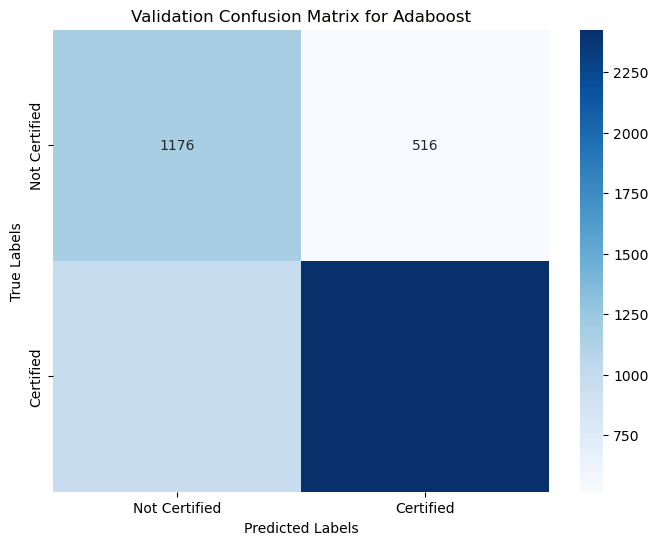

dtree - Validation:
  Recall: 0.6281, Precision: 0.7713, F1 Score: 0.6924, Accuracy: 0.6272


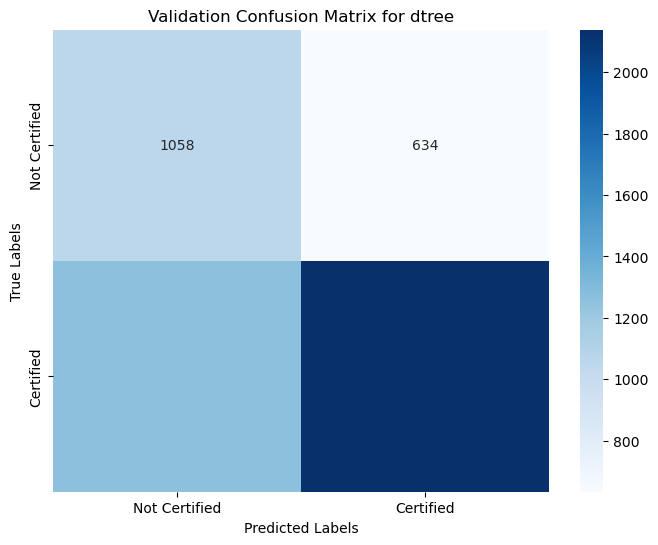

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

# Training Performance
print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    
    # Training Predictions
    y_train_pred = model.predict(X_train_un)
    
    # Calculate metrics for training
    recall_train = recall_score(y_train_un, y_train_pred)
    precision_train = precision_score(y_train_un, y_train_pred)
    f1_train = f1_score(y_train_un, y_train_pred)
    accuracy_train = accuracy_score(y_train_un, y_train_pred)

    print(f"{name} - Training:")
    print(f"  Recall: {recall_train:.4f}, Precision: {precision_train:.4f}, F1 Score: {f1_train:.4f}, Accuracy: {accuracy_train:.4f}")
    
    # Confusion Matrix for training
    cm_train = confusion_matrix(y_train_un, y_train_pred)
    
    # Plotting confusion matrix for training
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Certified', 'Certified'], yticklabels=['Not Certified', 'Certified'])
    plt.title(f'Training Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Validation Performance
print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)

    # Validation Predictions
    y_val_pred = model.predict(X_val)

    # Calculate metrics for validation
    recall_val = recall_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)

    print(f"{name} - Validation:")
    print(f"  Recall: {recall_val:.4f}, Precision: {precision_val:.4f}, F1 Score: {f1_val:.4f}, Accuracy: {accuracy_val:.4f}")
    
    # Confusion Matrix for validation
    cm_val = confusion_matrix(y_val, y_val_pred)
    
    # Plotting confusion matrix for validation
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Certified', 'Certified'], yticklabels=['Not Certified', 'Certified'])
    plt.title(f'Validation Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


Training and Validation Performance Difference:

Bagging:
  Recall      -> Training: 0.9703, Validation: 0.6093, Difference: 0.3610
  Precision   -> Training: 0.9921, Validation: 0.8289, Difference: 0.1632
  F1 Score    -> Training: 0.9811, Validation: 0.7023, Difference: 0.2787
  Accuracy    -> Training: 0.9813, Validation: 0.6550, Difference: 0.3263



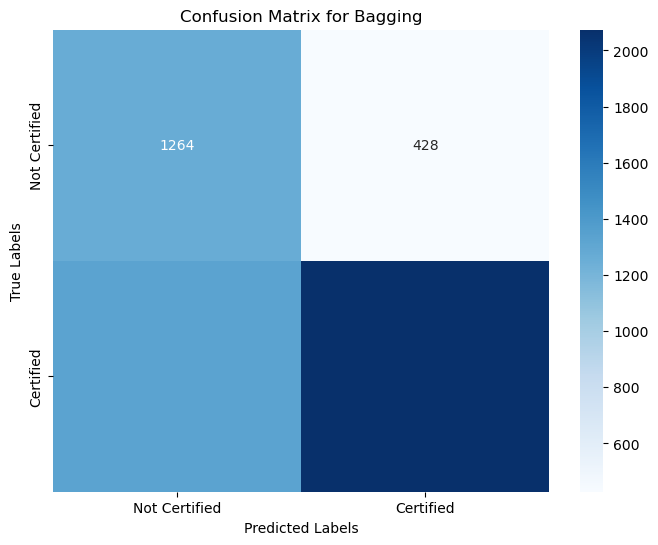

Random forest:
  Recall      -> Training: 1.0000, Validation: 0.6789, Difference: 0.3211
  Precision   -> Training: 1.0000, Validation: 0.8224, Difference: 0.1776
  F1 Score    -> Training: 1.0000, Validation: 0.7438, Difference: 0.2562
  Accuracy    -> Training: 1.0000, Validation: 0.6876, Difference: 0.3124



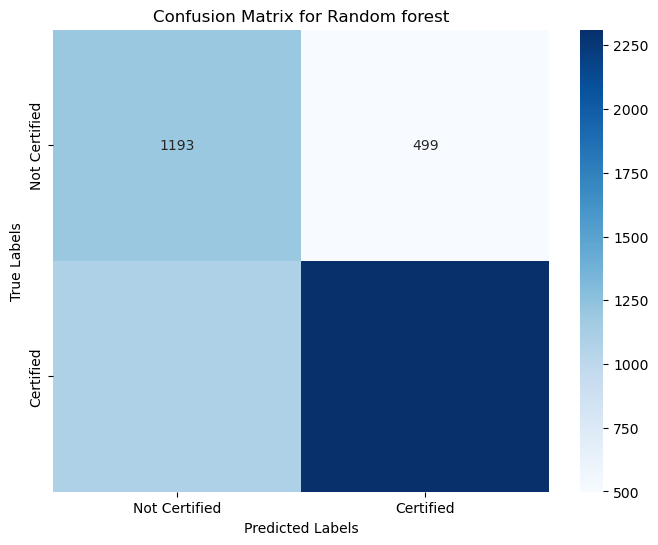

GBM:
  Recall      -> Training: 0.7468, Validation: 0.7306, Difference: 0.0161
  Precision   -> Training: 0.7085, Validation: 0.8293, Difference: -0.1208
  F1 Score    -> Training: 0.7271, Validation: 0.7768, Difference: -0.0497
  Accuracy    -> Training: 0.7198, Validation: 0.7196, Difference: 0.0002



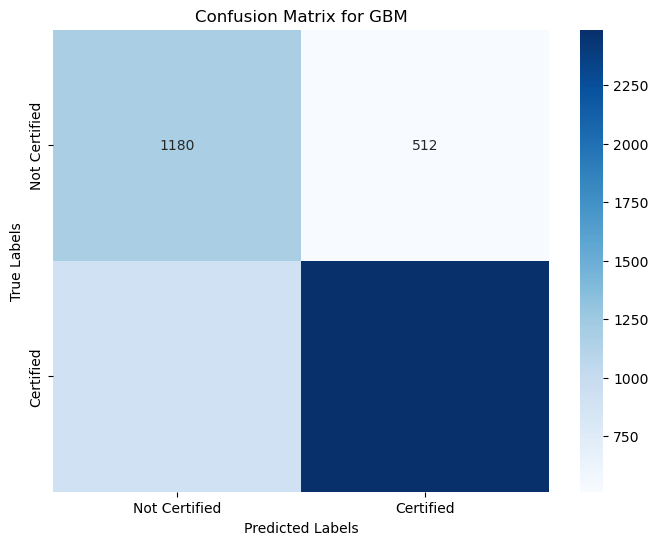

Adaboost:
  Recall      -> Training: 0.7182, Validation: 0.7127, Difference: 0.0055
  Precision   -> Training: 0.6936, Validation: 0.8246, Difference: -0.1310
  F1 Score    -> Training: 0.7057, Validation: 0.7646, Difference: -0.0589
  Accuracy    -> Training: 0.7005, Validation: 0.7068, Difference: -0.0064



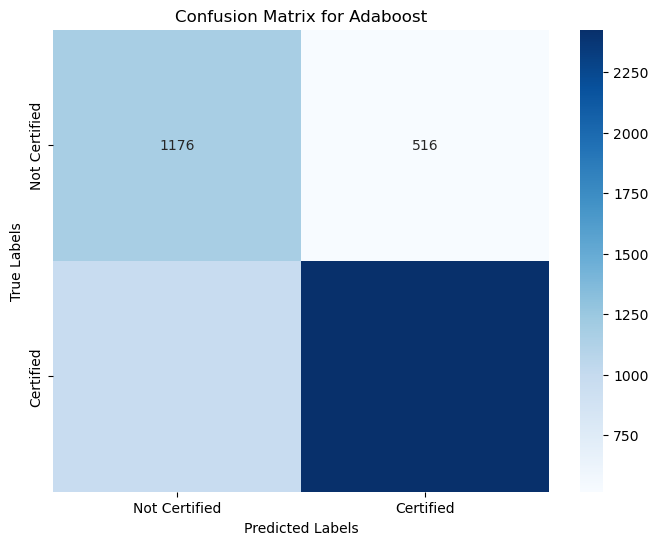

dtree:
  Recall      -> Training: 1.0000, Validation: 0.6281, Difference: 0.3719
  Precision   -> Training: 1.0000, Validation: 0.7713, Difference: 0.2287
  F1 Score    -> Training: 1.0000, Validation: 0.6924, Difference: 0.3076
  Accuracy    -> Training: 1.0000, Validation: 0.6272, Difference: 0.3728



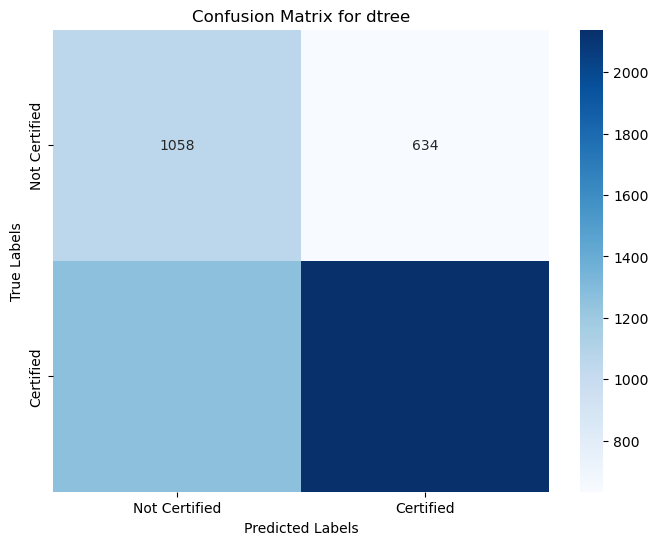

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix

print("\nTraining and Validation Performance Difference:\n")

# Loop over each model
for name, model in models:
    # Fit the model on the unbalanced training data
    model.fit(X_train_un, y_train_un)
    
    # Predictions for training and validation sets
    y_train_pred = model.predict(X_train_un)
    y_val_pred = model.predict(X_val)
    
    # Metrics for Training
    recall_train = recall_score(y_train_un, y_train_pred)
    precision_train = precision_score(y_train_un, y_train_pred)
    f1_train = f1_score(y_train_un, y_train_pred)
    accuracy_train = accuracy_score(y_train_un, y_train_pred)
    
    # Metrics for Validation
    recall_val = recall_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)
    
    # Differences between Training and Validation metrics
    recall_diff = recall_train - recall_val
    precision_diff = precision_train - precision_val
    f1_diff = f1_train - f1_val
    accuracy_diff = accuracy_train - accuracy_val
    
    # Print the differences
    print(f"{name}:")
    print(f"  Recall      -> Training: {recall_train:.4f}, Validation: {recall_val:.4f}, Difference: {recall_diff:.4f}")
    print(f"  Precision   -> Training: {precision_train:.4f}, Validation: {precision_val:.4f}, Difference: {precision_diff:.4f}")
    print(f"  F1 Score    -> Training: {f1_train:.4f}, Validation: {f1_val:.4f}, Difference: {f1_diff:.4f}")
    print(f"  Accuracy    -> Training: {accuracy_train:.4f}, Validation: {accuracy_val:.4f}, Difference: {accuracy_diff:.4f}\n")
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Certified', 'Certified'], yticklabels=['Not Certified', 'Certified'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

* Adaboost has the best performance followed by GBM model as per the validation performance

- After building 15 models, it was observed that both the GBM and Adaboost models, trained on an undersampled dataset, as well as the GBM model trained on an oversampled dataset, exhibited strong performance on both the training and validation datasets.
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
- We will tune these 3 models using the same data (undersampled or oversampled) as we trained them on before

## Hyperparameter Tuning

### Tuning AdaBoostClassifier model with Undersampled data

In [89]:
%%time

# Define the model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Create multiple scorers for evaluation
scoring = {
    'recall': metrics.make_scorer(metrics.recall_score),
    'precision': metrics.make_scorer(metrics.precision_score),
    'f1': metrics.make_scorer(metrics.f1_score),
    'accuracy': metrics.make_scorer(metrics.accuracy_score)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid,
                                    n_jobs=-1, n_iter=50, scoring=scoring, 
                                    cv=5, refit='f1', random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

# Getting the best parameters and scores for all metrics
print("Best parameters are {} with CV f1_score={:.4f}".format(randomized_cv.best_params_, randomized_cv.best_score_))

# Get the best score for each metric
for metric in scoring.keys():
    print(f"Best {metric} score: {randomized_cv.cv_results_[f'mean_test_{metric}'][randomized_cv.best_index_]:.4f}")

Best parameters are {'n_estimators': 20, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV f1_score=0.7178
Best recall score: 0.7562
Best precision score: 0.6835
Best f1 score: 0.7178
Best accuracy score: 0.7028
CPU times: total: 1.44 s
Wall time: 1min 26s


In [90]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [91]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.702,0.721,0.694,0.707


In [92]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.710,0.717,0.826,0.767


### Tuning  Gradient Boosting model with Undersampled Data

In [93]:
%%time

# Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125, 175, 25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.5, 0.7, 1],
}

# Create multiple scorers for evaluation
scoring = {
    'recall': metrics.make_scorer(metrics.recall_score),
    'precision': metrics.make_scorer(metrics.precision_score),
    'f1': metrics.make_scorer(metrics.f1_score),
    'accuracy': metrics.make_scorer(metrics.accuracy_score)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid,
                                    n_iter=50, scoring=scoring, 
                                    cv=5, refit='f1', random_state=1, n_jobs=-1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

# Getting the best parameters and scores for all metrics
print("Best parameters are {} with CV f1_score={:.4f}".format(randomized_cv.best_params_, randomized_cv.best_score_))

# Get the best score for each metric
for metric in scoring.keys():
    print(f"Best {metric} score: {randomized_cv.cv_results_[f'mean_test_{metric}'][randomized_cv.best_index_]:.4f}")

Best parameters are {'subsample': 1, 'n_estimators': 125, 'max_features': 1, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV f1_score=0.7223
Best recall score: 0.7684
Best precision score: 0.6815
Best f1 score: 0.7223
Best accuracy score: 0.7046
CPU times: total: 2.53 s
Wall time: 5min 34s


In [94]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=0.9)

In [95]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.703,0.712,0.700,0.706


In [96]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.707,0.706,0.830,0.763


### Tuning Gradient Boosting model with Oversampled data

In [97]:
%%time

# Defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75, 150, 25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample": [0.5, 0.7, 1],
    "max_features": [0.5, 0.7, 1],
}

# Create multiple scorers for evaluation
scoring = {
    'recall': metrics.make_scorer(metrics.recall_score),
    'precision': metrics.make_scorer(metrics.precision_score),
    'f1': metrics.make_scorer(metrics.f1_score),
    'accuracy': metrics.make_scorer(metrics.accuracy_score)
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                    param_distributions=param_grid,
                                    n_iter=50, 
                                    scoring=scoring, 
                                    cv=5, 
                                    refit='f1',  # Refit the best model based on recall
                                    random_state=1, 
                                    n_jobs=-1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

# Getting the best parameters and scores for all metrics
print("Best parameters are {} with CV f1_score={:.4f}".format(randomized_cv.best_params_, randomized_cv.best_score_))

# Get the best score for each metric
for metric in scoring.keys():
    print(f"Best {metric} score: {randomized_cv.cv_results_[f'mean_test_{metric}'][randomized_cv.best_index_]:.4f}")

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV f1_score=0.8005
Best recall score: 0.8529
Best precision score: 0.7704
Best f1 score: 0.8005
Best accuracy score: 0.7774
CPU times: total: 4.16 s
Wall time: 6min 51s


In [98]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=1,
    learning_rate=1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=1, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.7)

In [99]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.692,0.713,0.684,0.698


In [100]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.707,0.706,0.830,0.763


## Model Comparison and Final Model Selection

In [101]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.703,0.692,0.702
Recall,0.712,0.713,0.721
Precision,0.700,0.684,0.694
F1,0.706,0.698,0.707


In [102]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.707,0.707,0.710
Recall,0.706,0.706,0.717
Precision,0.830,0.830,0.826
F1,0.763,0.763,0.767


- AdaBoost model trained with undersampled data has generalised performance, so let's consider it as the best model.

In [103]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_adb, X_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.705,0.729,0.811,0.768


- The Adaboost model trained on undersampled data has given ~77% F1 score on the test set
- This performance is in line with what we achieved with this model on the train and validation sets
- So, this is a generalized model

### Feature Importance

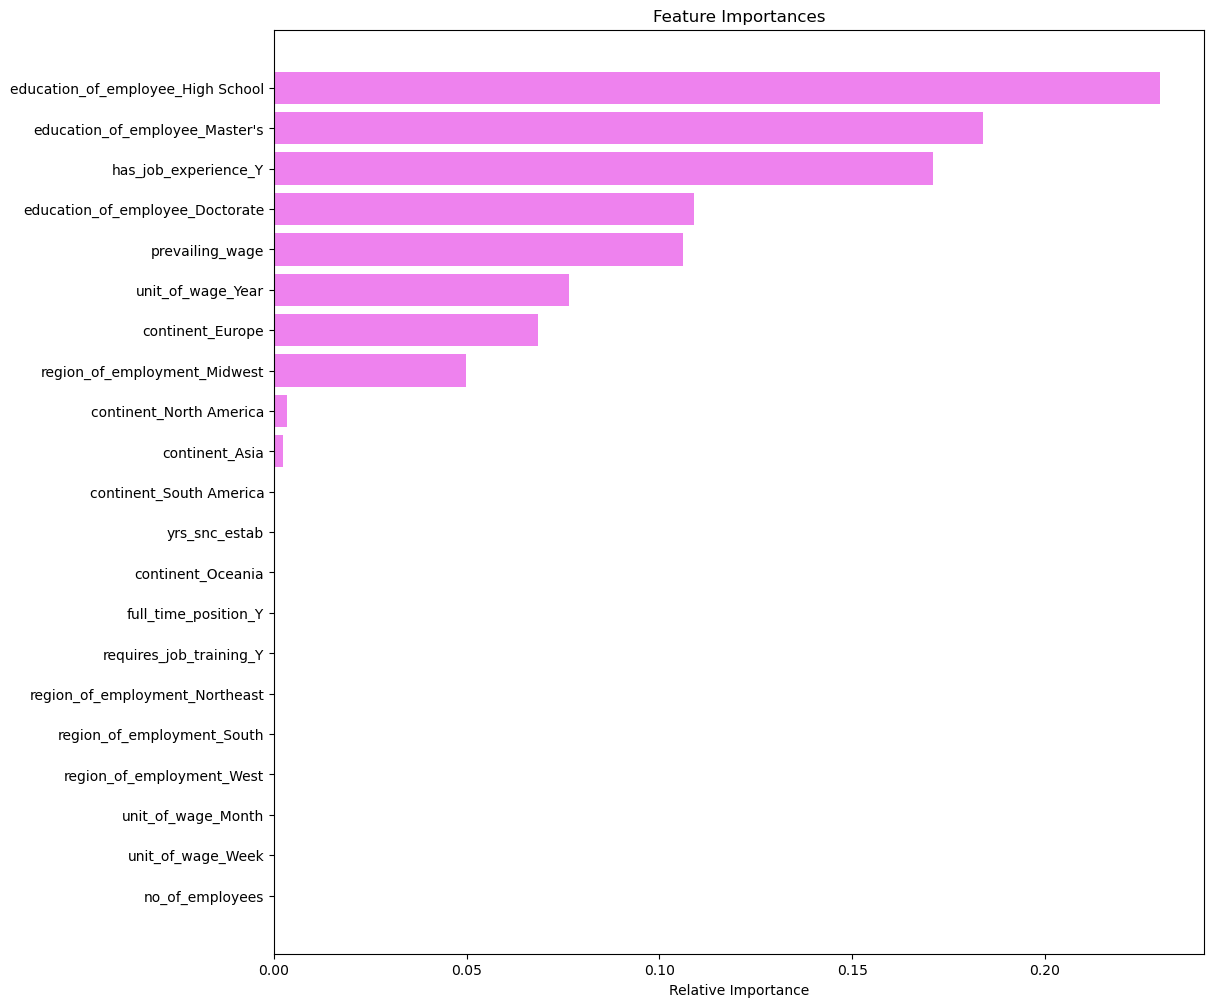

In [104]:
feature_names = X_train.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- We can see that education of employee high school,education of employee masters,has job experience,prevailing wage and education of employee doctorate are the most important features for making predictions

# Business Insights and Recommendations